# Part 4: Machine Learning 

<img src="https://www.fsm.ac.in/blog/wp-content/uploads/2022/08/ml-e1610553826718.jpg" width="800" height="800">

# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor

# Read CSV

In [2]:
df = pd.read_csv("df_final.csv")
df.head()

,resale_price,floor_area_sqm,occupancy_period,Nearest MRT Distance,Nearest Mall Distance,Number of Bus Stops,Nearest Bus Stop Distance,Nearest NPC Distance,Nearest School Distance,Nearest Green Area Distance,...,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,storey_type_Lower,storey_type_Middle,storey_type_Upper
0,232000.0,44.0,38,1.003997,1.000654,2.0,0.091925,0.829747,0.219348,0.693469,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,250000.0,67.0,39,0.189875,1.157763,3.0,0.166313,1.506198,0.242224,0.636510,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,262000.0,67.0,37,0.535117,1.938852,2.0,0.123479,1.182304,0.777627,1.113168,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,265000.0,68.0,37,0.945529,0.892904,2.0,0.069453,0.737154,0.517985,0.898934,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,265000.0,67.0,37,0.501151,1.983038,3.0,0.155488,1.192218,0.782772,1.157278,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208389 entries, 0 to 208388
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   resale_price                 208389 non-null  float64
 1   floor_area_sqm               208389 non-null  float64
 2   occupancy_period             208389 non-null  int64  
 3   Nearest MRT Distance         208389 non-null  float64
 4   Nearest Mall Distance        208389 non-null  float64
 5   Number of Bus Stops          208389 non-null  float64
 6   Nearest Bus Stop Distance    208389 non-null  float64
 7   Nearest NPC Distance         208389 non-null  float64
 8   Nearest School Distance      208389 non-null  float64
 9   Nearest Green Area Distance  208389 non-null  float64
 10  crimes_recorded              208389 non-null  int64  
 11  upmarket_mrt_index           208389 non-null  float64
 12  upmarket_model_index         208389 non-null  float64
 13 

# Overview of ML Training and Evaluation

<hr>

In this project we aim to build an ML model that will allow us to predict the price of HDB resale flat in Singapore given inputs such as the floor area, year of registration and nearby amenities,etc.
We will be employing the following models we have learnt in CS3244 to help us achieve our goal:
- `Lasso Regression`
- `Ridge Regression`
- `K Nearest Neighbour`
- `Decision Tree`
- `Random Forest`
- `AdaBoost` 
- `XGBoost`

Furthermore, we will also be using techniques that we have learnt such as different feature selection cross-validation as well as hyper-parameter tuning using GridSearchCV and manual observation in order to optimize our model performance.

Our general training and evaluation methodology is outlined below. 

### General steps to train the model:
1) `Train-val-test split` on the full dataset.
2) `Standard Scaler` to scale our dataset. Tree-based methods do not require scaling but we decided to use scaled data consistently for all our models training.
4) Split the training set into trainset and valset.
5) Carry out `feature selection` using feature importance / weights to observe if it reduces any noise and improve model performance.
6) Fit the trainset on the base model. Calculate the performace of the model using `negative mean squared error`.
7) Predict the valset using the fitted model. Calculate the validation error.
8) Fine-tune the hyper-parameters and repeat steps 4 & 5 to reduce the training and validation error.
9) Evaluate the model with the best hyper-parameters using `K-Fold Cross Validation` with `negative mean squared error`.
10) Predict the test set and calculate the `mean squared error`, `mean absolute error`, `R2 score`.


# Train-Val-Test Split

In [4]:
X = df.drop("resale_price", axis=1)
y = df["resale_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_trainset, X_valset, y_trainset, y_valset = train_test_split(X_train_scaled, y_train, test_size=0.2)

# 1) Linear Regression

## 1.1) Train a baseline `Linear Regression` model

In [5]:
# Train linear regression model
LR_model = LinearRegression()
LR_model.fit(X_train_scaled, y_train)

# Predictions on the testing set
y_pred = LR_model.predict(X_test_scaled)

# Calculate mean squared error, mean absolute error, and R-squared
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Print respective weights of the features
weights = pd.DataFrame({'Feature': X.columns, 'Weights': LR_model.coef_})
print("\nLearned Coefficients:")
print(weights)

Mean Squared Error: 6025257609.130421
Mean Absolute Error: 57851.66438335892
R-squared: 0.7216491978719629

Learned Coefficients:
                        Feature       Weights
0                floor_area_sqm  7.771223e+04
1              occupancy_period -1.270451e+04
2          Nearest MRT Distance -9.127969e+03
3         Nearest Mall Distance  6.626425e+03
4           Number of Bus Stops -9.207296e+03
5     Nearest Bus Stop Distance -6.226689e+02
6          Nearest NPC Distance -9.042108e+02
7       Nearest School Distance  1.427547e+04
8   Nearest Green Area Distance -1.311267e+04
9               crimes_recorded  1.061669e+04
10           upmarket_mrt_index  1.247776e+04
11         upmarket_model_index  2.140900e+04
12          upmarket_town_index  4.854920e+02
13          upmarket_mall_index  1.214038e+04
14        upmarket_school_index  3.167894e+04
15         upmarket_green_index  1.643535e+03
16                    year_2012  5.587431e+15
17                    year_2013  5.067802e

The absolute value of the weights indicate the extent to which the change in a specific feature will result in a change in the resale price of HDB flats. Thus, a smaller absolute value would indicate that the feature is less significant. To remove insignificant features, we will remove those with abs(weights) < 1000.

## 1.2) Feature Selection

In [6]:
# Remove insignificant features
X_2 = df.drop(columns=['resale_price', 'Nearest Bus Stop Distance', 'Nearest NPC Distance', 'upmarket_town_index'])
y = df['resale_price']

# Split data into training and testing sets
X_train_2, X_test_2, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_2_scaled = scaler.fit_transform(X_train_2)
X_test_2_scaled = scaler.transform(X_test_2)

# Train linear regression model
LR_model = LinearRegression()
LR_model.fit(X_train_2_scaled, y_train)

# Predictions on the testing set
y_pred = LR_model.predict(X_test_2_scaled)

# Calculate mean squared error, mean absolute error, and R-squared
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Print respective weights of the features
weights = pd.DataFrame({'Feature': X_2.columns, 'Weights': LR_model.coef_})
print("\nLearned Coefficients:")
print(weights)

Mean Squared Error: 6026023620.014118
Mean Absolute Error: 57846.793617832176
R-squared: 0.7216138102159078

Learned Coefficients:
                        Feature       Weights
0                floor_area_sqm  7.777066e+04
1              occupancy_period -1.253337e+04
2          Nearest MRT Distance -9.150584e+03
3         Nearest Mall Distance  6.448209e+03
4           Number of Bus Stops -8.872120e+03
5       Nearest School Distance  1.414958e+04
6   Nearest Green Area Distance -1.320464e+04
7               crimes_recorded  1.046459e+04
8            upmarket_mrt_index  1.263380e+04
9          upmarket_model_index  2.143764e+04
10          upmarket_mall_index  1.213179e+04
11        upmarket_school_index  3.172171e+04
12         upmarket_green_index  1.869166e+03
13                    year_2012  2.047326e+15
14                    year_2013  1.856925e+15
15                    year_2014  1.852455e+15
16                    year_2015  1.952468e+15
17                    year_2016  2.031867

After removing the insignificant features, the MSE increased while the MAE and R-squared decrease. This indicates that the model's performance did not improve.

There are a few possible reasons as to why the model did not improve after removing these features.

1) **Correlation with other features:** The removed features might be highly correlated with other features that remain in the model. As the information captured by the removed features are still present in the remaining features, removing these feature may not significantly impact the predictive power of the model. 'Nearest Bus Stop Distance' could be highly correlated to features such as 'Nearest MRT Distance' and 'Nearest Mall Distance' due to the fact that bus stops are often built near mrt stations and malls to improve accessibility and connectivity of the area. 

2) **Underfitting:** Removing features might lead to underfitting if the model becomes too simple and cannot capture the underlying patterns in the data effectively. Thus, the model's performance may not improve despite removing supposedly insignificant features.

3) **Noise in data:** Features that appear to be less significant based on their weights may still contain useful information. Removing these features might lead to the loss of valuable predictive information and degrade model performance.

Thus, we will not be removing these features.

## 1.3) Lasso Regression

## 1.3.1) Feature Selection


As normal Linear Regression do not have any hyper-parameters to tune. We will be exploring Lasso and Ridge Regression as we can tune the alpha values.

In [5]:
# Import package
from sklearn.linear_model import Lasso

# Create and fit Lasso regression model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

# Get feature importance (non-zero coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
non_zero_coefficients = coefficients[coefficients['Coefficient'] != 0]

# Sort coefficients by absolute value to see most important features
non_zero_coefficients = non_zero_coefficients.reindex(non_zero_coefficients['Coefficient'].abs().sort_values(ascending=False).index)

# Print feature importance
print("Non-zero Coefficients:")
print(non_zero_coefficients)

Non-zero Coefficients:
                        Feature   Coefficient
0                floor_area_sqm  77902.375059
14        upmarket_school_index  31672.698185
26            storey_type_Lower -21484.339803
11         upmarket_model_index  21399.949448
7       Nearest School Distance  14267.555778
25                    year_2021  13443.511743
8   Nearest Green Area Distance -13114.488619
1              occupancy_period -12640.912332
10           upmarket_mrt_index  12469.158799
13          upmarket_mall_index  12142.511102
9               crimes_recorded  10625.300728
4           Number of Bus Stops  -9205.783324
2          Nearest MRT Distance  -9129.218271
22                    year_2018  -7163.276525
23                    year_2019  -7097.757768
3         Nearest Mall Distance   6618.433930
17                    year_2013   6549.915681
16                    year_2012  -5531.225639
28            storey_type_Upper   4837.207659
21                    year_2017  -4193.243154
19         

Remove features with absolute values of coefficients < 1000 in order to remove the insignificant features.

In [117]:
# Split data into X and y
X_3 = df.drop(columns=['resale_price', 'upmarket_town_index', 'year_2014', 'Nearest Bus Stop Distance', 'Nearest NPC Distance'])
y = df['resale_price']

# Split data into training and testing sets
X_train_3, X_test_3, y_train, y_test = train_test_split(X_3, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_3_scaled = scaler.fit_transform(X_train_3)
X_test_3_scaled = scaler.transform(X_test_3)

# Create and fit the Lasso regression model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_3_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_3_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 6026023638.765695
Mean Absolute Error: 57853.71494144677
R-squared: 0.7216138093496349


After removing the insignificant features, the MSE and MAE increased while the R-squared decreased, thus the model performance did not improve after removing the insignificant features.

There are a few possible reasons as to why the model did not improve after removing these features.

1) **Correlation with other features:** This explanation is similar to the one above.

2) **Model Complexity:** Lasso regression already penalizes the model for complexity by shrinking less significant coefficients to zero. Removing additional features may overly simplify the model, leading to underfitting and poorer performance on unseen data.

3) **Selection Bias:** The features identified as insignificant by Lasso regression might not truly be irrelevant to the target variable. There could be biases in the data or limitations in the model's ability to capture complex relationships, leading to incorrect identification of features as insignificant.

Thus, these features will not be removed.

## 1.3.2) Hyper-parameters Tuning

Results for Lasso Regression with alpha = 0.01:
----------------------------------------
Training score: -5871775462.912897
----------------------------------------
Validation score: -6025195387.617455
----------------------------------------
Results for Lasso Regression with alpha = 0.1:
----------------------------------------
Training score: -5871775463.164447
----------------------------------------
Validation score: -6025195452.1767435
----------------------------------------
Results for Lasso Regression with alpha = 1:
----------------------------------------
Training score: -5871775490.1425
----------------------------------------
Validation score: -6025191735.461945
----------------------------------------
Results for Lasso Regression with alpha = 10:
----------------------------------------
Training score: -5871778189.808679
----------------------------------------
Validation score: -6025161332.058276
----------------------------------------
Results for Lasso Regression with a

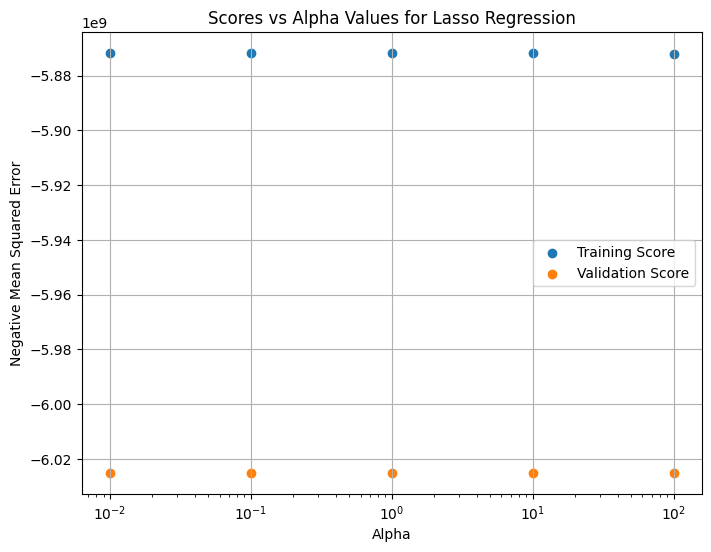

In [6]:
# Determine the range of alpha values to be tested
alpha_range = [0.01, 0.1, 1, 10, 100]
train_scores = []
val_scores = []

# Testing the model with different alpha values
for alpha_value in alpha_range:
    lasso_model = Lasso(alpha=alpha_value, max_iter=10000)
    lasso_model.fit(X_train_scaled, y_train)
    print(f"Results for Lasso Regression with alpha = {alpha_value}:")
    print("----------------------------------------")

    train_pred = lasso_model.predict(X_train_scaled)
    train_score = mean_squared_error(y_train, train_pred)
    train_scores.append(-1 * train_score)  # Multiply by -1 to make negative
    print(f"Training score: -{train_score}")
    print("----------------------------------------")

    val_pred = lasso_model.predict(X_test_scaled)
    val_score = mean_squared_error(y_test, val_pred)
    val_scores.append(-1 * val_score)  # Multiply by -1 to make negative
    print(f"Validation score: -{val_score}")
    print("----------------------------------------")

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(alpha_range, train_scores, label='Training Score')
plt.scatter(alpha_range, val_scores, label='Validation Score')
plt.title('Scores vs Alpha Values for Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

It is observed that as the alpha value increases, both the training and validation score decreases, indicating a decrease in model performance. This suggests that higher values of alpha lead to stronger regularization, which can help prevent overfitting but may also reduce the model's ability to capture the underlying patterns in the data. In order to obtain a balance in the bias and variance, the 5 fold cross validation is used to determine the optimal alpha value.

## 1.3.3) `5-fold cross validation` to evaluate Linear Regression with chosen parameter

In [7]:
# Lasso regression model with determined hyper-parameters
lasso_final = Lasso(alpha=0.01)

# Cross-validation
cv_scores = cross_val_score(lasso_final, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean score
print(f"The mean score is {np.mean(cv_scores)}")

The mean score is -5874487284.324749


In [8]:
# Lasso regression model with determined hyper-parameters
lasso_final = Lasso(alpha=1)

# Cross-validation
cv_scores = cross_val_score(lasso_final, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean score
print(f"The mean score is {np.mean(cv_scores)}")

The mean score is -5874487316.330685


In [9]:
# Lasso regression model with determined hyper-parameters
lasso_final = Lasso(alpha=100)

# Cross-validation
cv_scores = cross_val_score(lasso_final, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean score
print(f"The mean score is {np.mean(cv_scores)}")

The mean score is -5874761966.572614


Based on the results of hyper-parameter tuning and 5-fold cross-validation, we can choose the optimal alpha value by selecting the one that minimizes the mean score (mean squared error). The alpha value which gives the lowest mean score is alpha = 0.01. This value provides the best balance between training performance and generalization to unseen data.

## 1.3.4) Predicting test set with fitted model


In [11]:
# Fit Lasso regression model on the training set
lasso_final = Lasso(alpha=0.01)
lasso_final.fit(X_train_scaled, y_train)

# Make predictions on test set
test_pred = lasso_final.predict(X_test_scaled)

# Calculate mean squared error, mean absolute error, and R-squared
test_MSE = mean_squared_error(y_test, test_pred)
test_MAE = mean_absolute_error(y_test, test_pred)
test_R2 = r2_score(y_test, test_pred)

# Print results
print("Mean Squared Error:", test_MSE)
print("Mean Absolute Error:", test_MAE)
print("R-squared:", test_R2)

Mean Squared Error: 6025195387.617455
Mean Absolute Error: 57858.13632363138
R-squared: 0.7216520723396069


**Original Regression Model Results:**
<br>Mean Squared Error: 6025257609.130421
<br>Mean Absolute Error: 57851.66438335892
<br>R-squared: 0.7216491978719629

**New Fitted Model Results:**
<br>Mean Squared Error: 6025195387.617455
<br>Mean Absolute Error: 57858.13632363138
<br>R-squared: 0.7216520723396069

**Conclusion:**
<br>Based on these metrics, the new fitted model does not offer significant improvement over the original regression model. The differences in performance between the two models are minimal and may not be practically significant. This is due to the fact that both models were using the same alpha value.

## 1.4) Ridge regression

## 1.4.1) Feature Selection

In [14]:
# Import package
from sklearn.linear_model import Ridge

# Create and fit Ridge regression model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)

# Get feature importance (coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge.coef_})

# Sort coefficients by absolute value to see most important features
coefficients = coefficients.reindex(coefficients['Coefficient'].abs().sort_values(ascending=False).index)

# Print feature importance
print("Coefficients:")
print(coefficients)

Coefficients:
                        Feature   Coefficient
0                floor_area_sqm  77902.322006
14        upmarket_school_index  31672.667495
11         upmarket_model_index  21399.977516
25                    year_2021  14908.752019
7       Nearest School Distance  14267.555605
8   Nearest Green Area Distance -13114.481285
1              occupancy_period -12640.927048
10           upmarket_mrt_index  12469.163210
13          upmarket_mall_index  12142.509774
26            storey_type_Lower -11145.696470
9               crimes_recorded  10625.295473
28            storey_type_Upper  10419.874991
4           Number of Bus Stops  -9205.792541
2          Nearest MRT Distance  -9129.223144
17                    year_2013   7677.032028
3         Nearest Mall Distance   6618.444164
27           storey_type_Middle   6168.637736
22                    year_2018  -5802.191719
23                    year_2019  -5790.229274
16                    year_2012  -4288.551564
21                  

Remove features with absolute values of coefficients < 1000 in order to remove the insignificant features.

In [15]:
# Split data into X and y
X_4 = df.drop(columns=['resale_price', 'upmarket_town_index', 'year_2020', 'Nearest Bus Stop Distance', 'Nearest NPC Distance'])
y = df['resale_price']

# Split the data into training and testing sets
X_train_4, X_test_4, y_train, y_test = train_test_split(X_4, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_4_scaled = scaler.fit_transform(X_train_4)
X_test_4_scaled = scaler.transform(X_test_4)

# Create and fit the Ridge regression model
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train_4_scaled, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test_4_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 6026023628.542587
Mean Absolute Error: 57853.716245678945
R-squared: 0.7216138098219151


After removing the insignificant features, the MSE and MAE increased while the R-squared decreased, thus the model performance has not improved.

There are a few possible reasons as to why the model did not improve after removing these features.

1) **Weak Feature Importance:** Ridge regression penalizes large coefficients but does not necessarily set them to zero. If the removed features had relatively small coefficients that were not significantly affecting the model's predictions, their removal may not lead to noticeable improvements in performance.

2) **Collinearity:** Ridge regression can handle multicollinearity to some extent by shrinking the coefficients of correlated features together. If the removed features were highly correlated with other features, their influence on the model may have been compensated for by other correlated features.

3) **Insufficient Regularization:** The chosen value of alpha may not have been sufficient to effectively shrink the coefficients of the removed features to zero. In such cases, removing these features would have little impact on the model's performance.

Thus, these features will not be removed. 

## 1.4.2) Hyper-parameters Tuning

Results for Ridge Regression with alpha = 0.01:
----------------------------------------
Training score: -5871775462.910396
----------------------------------------
Validation score: -6025195376.606925
----------------------------------------
Results for Ridge Regression with alpha = 0.1:
----------------------------------------
Training score: -5871775462.914312
----------------------------------------
Validation score: -6025195341.847217
----------------------------------------
Results for Ridge Regression with alpha = 1:
----------------------------------------
Training score: -5871775463.305981
----------------------------------------
Validation score: -6025194994.609134
----------------------------------------
Results for Ridge Regression with alpha = 10:
----------------------------------------
Training score: -5871775502.464805
----------------------------------------
Validation score: -6025191558.120505
----------------------------------------
Results for Ridge Regression with 

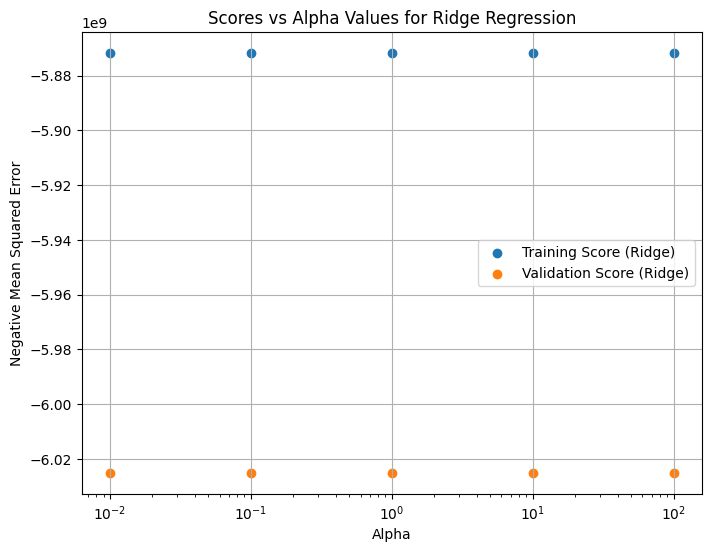

In [125]:
# Determine the range of alpha values to be tested
alpha_range = [0.01, 0.1, 1, 10, 100]
train_scores_ridge = []
val_scores_ridge = []

# Testing the model with different alpha values
for alpha_value in alpha_range:
    ridge_model = Ridge(alpha=alpha_value)
    ridge_model.fit(X_train_scaled, y_train)
    print(f"Results for Ridge Regression with alpha = {alpha_value}:")
    print("----------------------------------------")

    train_pred_ridge = ridge_model.predict(X_train_scaled)
    train_score_ridge = mean_squared_error(y_train, train_pred_ridge)
    train_scores_ridge.append(-1 * train_score_ridge)
    print(f"Training score: -{train_score_ridge}")
    print("----------------------------------------")

    val_pred_ridge = ridge_model.predict(X_test_scaled)
    val_score_ridge = mean_squared_error(y_test, val_pred_ridge)
    val_scores_ridge.append(-1 * val_score_ridge)
    print(f"Validation score: -{val_score_ridge}")
    print("----------------------------------------")

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(alpha_range, train_scores_ridge, label='Training Score (Ridge)')
plt.scatter(alpha_range, val_scores_ridge, label='Validation Score (Ridge)')
plt.title('Scores vs Alpha Values for Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

It is observed that as the alpha value increases, the absolute value of the training score increases and validation score decreases. Overall, the trend shows that the model's performance remains relatively stable for lower values of alpha (0.01 and 0.1), but deteriorates as alpha increases (10 and 100). This suggests that moderate regularization is beneficial for preventing overfitting and improving generalization, but too much regularization can lead to underfitting and poorer performance on both the training and validation datasets. In order to obtain a balance in the bias and variance, the 5 fold cross validation is used to determine the optimal alpha value.

## 1.4.3) `5-fold cross validation` to evaluate Ridge Regression with chosen parameter

In [126]:
# Ridge regression model with determined hyper-parameters
ridge_final = Ridge(alpha=0.01)

# Cross-validation
cv_scores = cross_val_score(ridge_final, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean score
print(f"The mean score is {np.mean(cv_scores)}")

The mean score is -5874487283.987239


In [127]:
# Ridge regression model with determined hyper-parameters
ridge_final = Ridge(alpha=1)

# Cross-validation
cv_scores = cross_val_score(ridge_final, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean score
print(f"The mean score is {np.mean(cv_scores)}")

The mean score is -5874487258.02415


In [128]:
# Ridge regression model with determined hyper-parameters
ridge_final = Ridge(alpha=100)

# Cross-validation
cv_scores = cross_val_score(ridge_final, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean score
print(f"The mean score is {np.mean(cv_scores)}")

The mean score is -5874490770.960852


Based on the results, the optimal alpha value is alpha = 1. This is because it has a relatively low training score, validation score, and mean score from cross-validation, indicating good performance and generalization.

Alpha values smaller than 1 show slightly higher validation scores, indicating potential overfitting, while alpha values larger than 1 start to show increasing cross-validation scores, suggesting underfitting due to excessive regularization. Therefore, alpha = 1 strikes a balance between bias and variance, making it the optimal choice for the model.

## 1.4.4) Predicting test set with fitted model

In [129]:
# Fit Ridge regression model on the training set
ridge_final = Ridge(alpha=1)
ridge_final.fit(X_train_scaled, y_train)

# Make predictions on test set
test_pred = ridge_final.predict(X_test_scaled)

# Calculate mean squared error, mean absolute error, and R-squared
test_MSE = mean_squared_error(y_test, test_pred)
test_MAE = mean_absolute_error(y_test, test_pred)
test_R2 = r2_score(y_test, test_pred)

# Print results
print("Mean Squared Error:", test_MSE)
print("Mean Absolute Error:", test_MAE)
print("R-squared:", test_R2)

Mean Squared Error: 6025194994.609134
Mean Absolute Error: 57858.09588117242
R-squared: 0.7216520904955411


**Original Regression Model Results:**
<br>Mean Squared Error: 6025257609.130421
<br>Mean Absolute Error: 57851.66438335892
<br>R-squared: 0.7216491978719629

**New Fitted Model Results:**
<br>Mean Squared Error: 6025194994.609134
<br>Mean Absolute Error: 57858.09588117242
<br>R-squared: 0.7216520904955411

**Conclusion:**
<br>Despite the slight differences in the mean squared error and mean absolute error between the original and new models, they are not significant. Both models have similar values for these metrics, indicating that they perform similarly in terms of predicting the target variable (resale_price).

However, the R-squared value for the new fitted model is slightly higher than that of the original model. This suggests that the new model explains a slightly larger proportion of the variance in the target variable compared to the original model. While the improvement is marginal, it indicates a slightly better fit of the new model to the data.

Overall, the new fitted model performs comparably to the original model, with a slight improvement in terms of explaining the variance in the target variable.

# 2) K Nearest Neighbour

## 2.1) Train a baseline `KNN` model

In [21]:
# Create KNN regression model
knn = KNeighborsRegressor(n_neighbors=5)

# Train model
knn.fit(X_train_scaled, y_train)

# Predictions on the testing set
y_pred = knn.predict(X_test_scaled)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 2628244950.2251287
Mean Absolute Error: 34825.13510336388
R-squared: 0.87858210593759


For kNN specifically, RFE can be used to improve the model's performance by selecting the most relevant features and potentially reducing noise and overfitting.

## 2.2) Recursive Feature Elimination (RFE)

In [21]:
from sklearn.feature_selection import RFE

# Initialize Linear Regression as estimator for RFE
linear_regression = LinearRegression()

# Initialize RFE with Linear Regression estimator
rfe = RFE(estimator=linear_regression, n_features_to_select=20, step=1)

# Fit RFE to training data
rfe.fit(X_train_scaled, y_train)

# Get selected features
selected_features = X.columns[rfe.support_]

# Train KNN model on the selected features
knn = KNeighborsRegressor()
knn.fit(X_train_scaled[:, rfe.support_], y_train)

# Predictions on the testing set
y_pred = knn.predict(X_test_scaled[:, rfe.support_])

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Print selected features
print("Selected Features:", selected_features)

Mean Squared Error: 2138041478.1834462
Mean Absolute Error: 30328.167188684674
R-squared: 0.9012281965283031
Selected Features: Index(['floor_area_sqm', 'Nearest School Distance',
       'Nearest Green Area Distance', 'crimes_recorded',
       'upmarket_model_index', 'upmarket_mall_index', 'upmarket_school_index',
       'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016',
       'year_2017', 'year_2018', 'year_2019', 'year_2020', 'year_2021',
       'storey_type_Lower', 'storey_type_Middle', 'storey_type_Upper'],
      dtype='object')


RFE reduced the MSE and MAE while the R-squared increase. A lower MSE indicates that the model's predictions are closer to the actual values, suggesting improved accuracy. Similarly, a lower MAE indicates that, on average, the model's predictions are closer to the true values. A higher R-squared value indicates that a larger proportion of the variance in the target variable is explained by the model, suggesting improved goodness of fit. Overall, these improvements suggest that the RFE technique helped identify and retain the most relevant features for predicting the target variable.

## 2.3 Hyper-parameters Tuning

### 2.2.1) Hyper-parameter 1: `n_neighbours`

Results for KNN Regression with n_neighbors = 3:
----------------------------------------
Training score: -865473827.7434107
----------------------------------------
Validation score: -1917364808.5667622
----------------------------------------
Results for KNN Regression with n_neighbors = 5:
----------------------------------------
Training score: -1331081295.3047123
----------------------------------------
Validation score: -2138041478.1834462
----------------------------------------
Results for KNN Regression with n_neighbors = 7:
----------------------------------------
Training score: -1693593855.873533
----------------------------------------
Validation score: -2371527412.176842
----------------------------------------
Results for KNN Regression with n_neighbors = 9:
----------------------------------------
Training score: -1975613517.9741533
----------------------------------------
Validation score: -2576482779.7780857
----------------------------------------


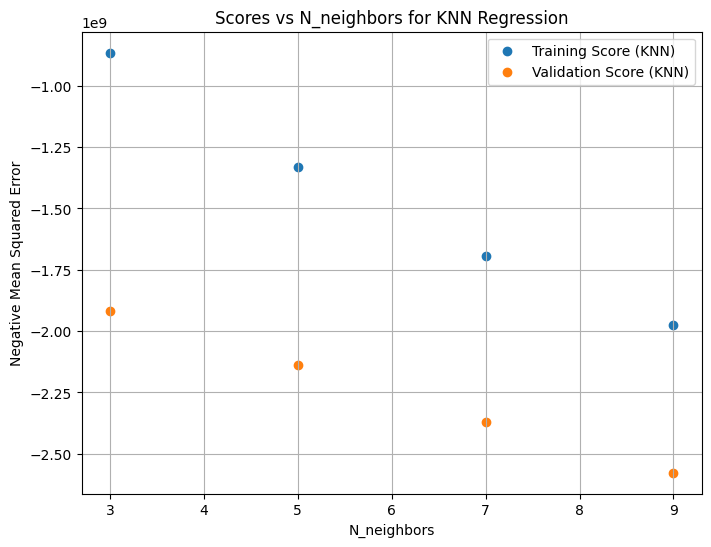

In [24]:
# Determine range of neighbors
n_neighbors_range = [3, 5, 7, 9]
train_scores_knn = []
val_scores_knn = []

# Testing the model with different n_neighbors values
for n_neighbors_value in n_neighbors_range:
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors_value)
    knn_model.fit(X_train_scaled[:, rfe.support_], y_train)
    print(f"Results for KNN Regression with n_neighbors = {n_neighbors_value}:")
    print("----------------------------------------")

    train_pred_knn = knn_model.predict(X_train_scaled[:, rfe.support_])
    train_score_knn = mean_squared_error(y_train, train_pred_knn)
    train_scores_knn.append(-1 * train_score_knn)
    print(f"Training score: -{train_score_knn}")
    print("----------------------------------------")

    val_pred_knn = knn_model.predict(X_test_scaled[:, rfe.support_])
    val_score_knn = mean_squared_error(y_test, val_pred_knn)
    val_scores_knn.append(-1 * val_score_knn)
    print(f"Validation score: -{val_score_knn}")
    print("----------------------------------------")

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(n_neighbors_range, train_scores_knn, label='Training Score (KNN)')
plt.scatter(n_neighbors_range, val_scores_knn, label='Validation Score (KNN)')
plt.title('Scores vs N_neighbors for KNN Regression')
plt.xlabel('N_neighbors')
plt.ylabel('Negative Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

From these results, we observe that as the number of neighbors increases, both the training and validation scores (MSE) also increase. This suggests that the model's performance worsens with a higher number of neighbors, indicating potential overfitting as it becomes more sensitive to noise in the data.

Therefore, based on the provided results, the optimal number of neighbors for the KNN regression model is n_neighbors = 3, as it has the lowest validation score among the tested values, indicating better generalization performance.

### 2.2.2) Hyper-parameter 2: `weights`

Results for KNN Regression with weights = uniform:
----------------------------------------
Training score: -1331081295.3047123
----------------------------------------
Validation score: -2138041478.1834462
----------------------------------------
Results for KNN Regression with weights = distance:
----------------------------------------
Training score: -164773448.61412975
----------------------------------------
Validation score: -1728709159.9407017
----------------------------------------


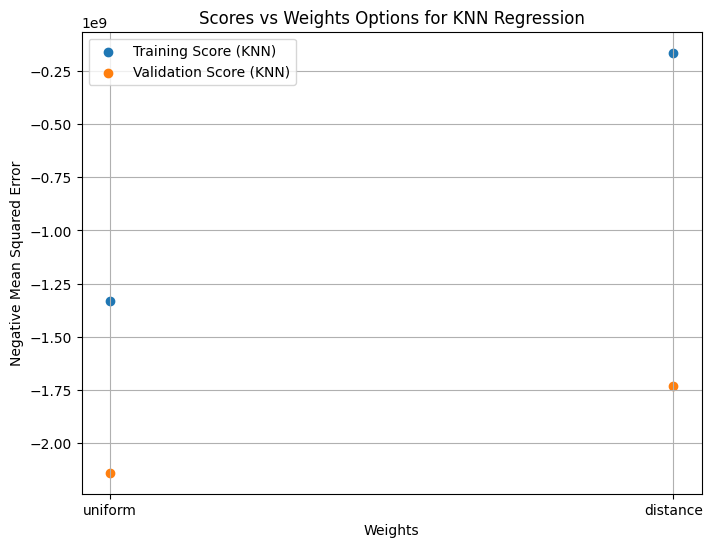

In [25]:
# Determine range of weights
weights_options = ['uniform', 'distance']
train_scores_weights = []
val_scores_weights = []

# Testing the model with different weights
for weight_option in weights_options:
    knn_model = KNeighborsRegressor(weights=weight_option)
    knn_model.fit(X_train_scaled[:, rfe.support_], y_train)
    print(f"Results for KNN Regression with weights = {weight_option}:")
    print("----------------------------------------")

    train_pred_weights = knn_model.predict(X_train_scaled[:, rfe.support_])
    train_score_weights = mean_squared_error(y_train, train_pred_weights)
    train_scores_weights.append(-1 * train_score_weights)
    print(f"Training score: -{train_score_weights}")
    print("----------------------------------------")

    val_pred_weights = knn_model.predict(X_test_scaled[:, rfe.support_])
    val_score_weights = mean_squared_error(y_test, val_pred_weights)
    val_scores_weights.append(-1 * val_score_weights)
    print(f"Validation score: -{val_score_weights}")
    print("----------------------------------------")

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(weights_options, train_scores_weights, label='Training Score (KNN)')
plt.scatter(weights_options, val_scores_weights, label='Validation Score (KNN)')
plt.title('Scores vs Weights Options for KNN Regression')
plt.xlabel('Weights')
plt.ylabel('Negative Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

It can be observed that using the "distance" weight option leads to significantly lower validation score (MSE) compared to using "uniform" weights. This indicates that assigning weights based on the distance to neighbors results in better model performance, as it gives more importance to closer neighbors in the prediction process.

Therefore, based on the results, the optimal weight option for the KNN regression model is weights = distance.

### 2.2.3) Hyper-parameter 3: `p`

Results for KNN Regression with p = 1:
----------------------------------------
Training score: -1206952560.4948297
----------------------------------------
Validation score: -1971423068.5953069
----------------------------------------
Results for KNN Regression with p = 2:
----------------------------------------
Training score: -1331081295.3047123
----------------------------------------
Validation score: -2138041478.1834462
----------------------------------------


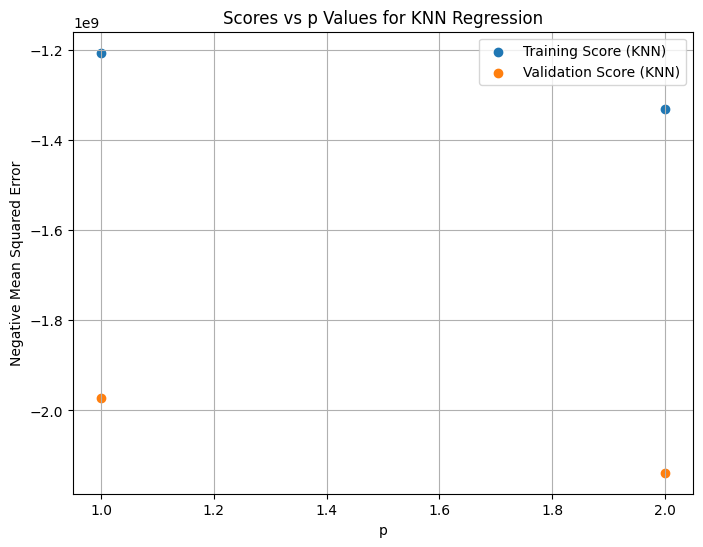

In [27]:
# Determine range of p
p_values = [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
train_scores_p = []
val_scores_p = []

# Testing the model with different p values
for p_value in p_values:
    knn_model = KNeighborsRegressor(p=p_value)
    knn_model.fit(X_train_scaled[:, rfe.support_], y_train)
    print(f"Results for KNN Regression with p = {p_value}:")
    print("----------------------------------------")

    train_pred_p = knn_model.predict(X_train_scaled[:, rfe.support_])
    train_score_p = mean_squared_error(y_train, train_pred_p)
    train_scores_p.append(-1 * train_score_p)
    print(f"Training score: -{train_score_p}")
    print("----------------------------------------")

    val_pred_p = knn_model.predict(X_test_scaled[:, rfe.support_])
    val_score_p = mean_squared_error(y_test, val_pred_p)
    val_scores_p.append(-1 * val_score_p)
    print(f"Validation score: -{val_score_p}")
    print("----------------------------------------")

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(p_values, train_scores_p, label='Training Score (KNN)')
plt.scatter(p_values, val_scores_p, label='Validation Score (KNN)')
plt.title('Scores vs p Values for KNN Regression')
plt.xlabel('p')
plt.ylabel('Negative Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

We observe that using the Manhattan distance metric (p = 1) leads to a lower validation score (MSE) compared to using the Euclidean distance metric (p = 2). This indicates that the model performs better when using the Manhattan distance metric for distance calculation.

Therefore, based on the results, the optimal value for p in the KNN regression model is p = 1 (Manhattan distance).

## 2.4) `5-fold cross validation` to evaluate KNN with chosen parameters

In [28]:
# Create KNN regression model with determined hyper-parameters
knn_final = KNeighborsRegressor(n_neighbors=3, weights="distance", p=1)

# Cross-validation
cv_scores_knn = cross_val_score(knn_final, X_train_scaled[:, rfe.support_], y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean score
print(f"The mean score is {np.mean(cv_scores_knn)}")

The mean score is -1791216162.8694077


The MSE value decreased with the selected parameters.

## 2.5) Predicting test set with fitted model

In [29]:
# Fit KNN regression model on the training set
knn_final.fit(X_train_scaled[:, rfe.support_], y_train)

# Make predictions on the test set using selected features
test_pred_knn = knn_final.predict(X_test_scaled[:, rfe.support_])

# Calculate mean squared error, mean absolute error, and R-squared
test_MSE_knn = mean_squared_error(y_test, test_pred_knn)
test_MAE_knn = mean_absolute_error(y_test, test_pred_knn)
test_R2_knn = r2_score(y_test, test_pred_knn)

# Print results
print("Mean Squared Error:", test_MSE_knn)
print("Mean Absolute Error:", test_MAE_knn)
print("R-squared:", test_R2_knn)

Mean Squared Error: 1615971029.219269
Mean Absolute Error: 26848.194104706294
R-squared: 0.9253464563046674


**Original Model Results:**
<br>Mean Squared Error: 2138041478.1834462
<br>Mean Absolute Error: 30328.167188684674
<br>R-squared: 0.9012281965283031

**New Fitted Model Results:** 
<br>Mean Squared Error: 1615971029.219269
<br>Mean Absolute Error: 26848.194104706294
<br>R-squared: 0.9253464563046674

**Conclusion:**
<br>After hyper-parameter tuning, the new fitted KNN model shows improvement across all evaluation metrics compared to the original model. The mean squared error (MSE) has decreased from approximately 2.14 billion to 1.62 billion, indicating that the new model has better predictive performance in terms of minimizing the squared differences between predicted and actual values. 

Similarly, the mean absolute error (MAE) has also decreased from approximately 30328 to 26848, suggesting that the average absolute difference between predicted and actual values has reduced. 

Moreover, the R-squared value has increased from approximately 0.901 to 0.925, indicating that the new model explains a higher proportion of the variance in the target variable.

In conclusion, the hyper-parameter tuning process has resulted in a KNN model that performs better.

# 3) Decision Tree

## 3.1) Train a baseline `Decision Tree` model

We will begin by training a base model using default settings to evaluate its performance on our datasets. Based on these initial results, we will make adjustments to refine and enhance the model's effectiveness.

In [30]:
# default: {`criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0`}

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_regressor.fit(X_trainset, y_trainset)

# Predict the labels of the test set
train_pred = dt_regressor.predict(X_trainset)
train_score = mean_squared_error(y_trainset, train_pred)

# Print result
print("Results:")
print("----------------------------------------")
print(f"Training score | -{train_score}")
print("----------------------------------------")

# Predict the labels of the validation set
val_pred = dt_regressor.predict(X_valset)
val_score = mean_squared_error(y_valset, val_pred)

# Print result
print(f"Validation score | -{val_score}")
print("----------------------------------------")



Results:
----------------------------------------
Training score | -142549806.96325165
----------------------------------------
Validation score | -1440217812.5419922
----------------------------------------


In [31]:
# model with tuned parameters
dt_regressor = DecisionTreeRegressor(random_state=42)

# evaluate cross validation score
cv_scores = cross_val_score(dt_regressor, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
# print(cv_scores)
print(f"Cross-validation: {np.mean(cv_scores)}")

Cross-validation: -1435970982.2081144


#### Conclusion:

- These scores indicate that the model is underperforming significantly, particularly on the validation set and during cross-validation. The large negative values suggest substantial errors between the predicted and actual values.

- The model's training score is much better compared to its validation and cross-validation scores, which implies it might be overfitting the training data.

- The substantial difference between the training and validation scores suggests a high variance problem, where the model is too complex relative to the amount of data provided or the features used are not providing the right information.

- We will be doing the following to improve the model:

  1. **Parameter Tuning**:
    - Adjust the model's parameters such as `max_depth`, `min_samples_split`, `min_samples_leaf` and more to control overfitting.
    - Use grid search to find the optimal settings.

  2. **Simplifying the Model**:
    - Reduce the complexity of the model by pruning (limiting the maximum depth of the tree) or by selecting fewer but more informative features.

  3. **Feature Selection**:
    - Reassess the features used for training the model. Remove features that are not affecting the model.

  4. **Cross-Validation**:
    - Employ more robust cross-validation techniques like K-Fold cross-validation to ensure the model's performance is consistent across different subsets of the dataset.

## 3.2) Hyper-parameters Tuning

### Since the validation score is significantly worse than the training score, it indicates a case of overfitting.

We will adust the following hyperparameters:

`max_depth`: Restricting the depth of the tree can prevent the model from becoming overly complex and memorizing the training data. A shallower tree is less likely to overfit.

`min_samples_split`: Increasing this value requires a node to have more samples before it can be split, which can lead to a simpler model.

`min_samples_leaf`: Setting a minimum number of samples for a leaf node ensures that the model doesn't create leaves with very few samples, which could be a sign of overfitting to the noise in the training data.

`max_features`: Limiting the number of features considered for each split can reduce the complexity of the model and can be particularly useful if some features are not informative.

`min_impurity_decrease`: This parameter controls the threshold for splitting nodes. A higher value can reduce model complexity by requiring a larger reduction in impurity to justify a split.

`ccp_alpha`: Cost complexity pruning (CCP) parameter can be used to prune the tree and avoid overfitting. A higher value of ccp_alpha will prune more aggressively, potentially leading to a simpler and more general model.

#### The following functions are defined to compare the performance of the model before and after parameter tuning:

In [32]:
# define a function to check 5 cross validation value
def k_cross_para(old_max_depth=None, old_min_samples_split=2, old_min_samples_leaf=1, old_max_features=None, old_min_impurity_decrease=0, old_ccp_alpha=0,
                 new_max_depth=None, new_min_samples_split=2, new_min_samples_leaf=1, new_max_features=None, new_min_impurity_decrease=0, new_ccp_alpha=0):

    # Old model with initial parameters
    old_dt_regressor = DecisionTreeRegressor(max_depth=old_max_depth, min_samples_split=old_min_samples_split, min_samples_leaf=old_min_samples_leaf,
                                             max_features=old_max_features, min_impurity_decrease=old_min_impurity_decrease, ccp_alpha=old_ccp_alpha, random_state=42)

    # Evaluate cross-validation score for the old model
    old_cv_scores = cross_val_score(old_dt_regressor,  X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    print("5-Fold Cross Validation Comparison:")
    print("----------------------------------------")
    print(f"Old Mean Score: {np.mean(old_cv_scores)}")

    # New model with tuned parameters
    new_dt_regressor = DecisionTreeRegressor(max_depth=new_max_depth, min_samples_split=new_min_samples_split, min_samples_leaf=new_min_samples_leaf,
                                             max_features=new_max_features, min_impurity_decrease=new_min_impurity_decrease, ccp_alpha=new_ccp_alpha, random_state=42)

    # Evaluate cross-validation score for the new model
    new_cv_scores = cross_val_score(new_dt_regressor,  X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    print("----------------------------------------")
    print(f"New Mean Score: {np.mean(new_cv_scores)}")
    print("----------------------------------------")


In [33]:
# define a function to compare the 2 models in terms of old and new training and validation test
def test_valid_para(old_max_depth=None, old_min_samples_split=2, old_min_samples_leaf=1, old_max_features=None, old_min_impurity_decrease=0, old_ccp_alpha=0,
                    new_max_depth=None, new_min_samples_split=2, new_min_samples_leaf=1, new_max_features=None, new_min_impurity_decrease=0, new_ccp_alpha=0):
    # Old model with initial parameters
    old_dt_regressor = DecisionTreeRegressor(max_depth=old_max_depth, min_samples_split=old_min_samples_split, min_samples_leaf=old_min_samples_leaf,
                                             max_features=old_max_features, min_impurity_decrease=old_min_impurity_decrease, ccp_alpha=old_ccp_alpha, random_state=42)
    old_dt_regressor.fit(X_trainset, y_trainset)
    old_train_pred = old_dt_regressor.predict(X_trainset)
    old_train_score = mean_squared_error(y_trainset, old_train_pred)
    old_val_pred = old_dt_regressor.predict(X_valset)
    old_val_score = mean_squared_error(y_valset, old_val_pred)

    print("Old Results:")
    print("----------------------------------------")
    print(f"Training score: -{old_train_score}")
    print("----------------------------------------")
    print(f"Validation score: -{old_val_score}")
    print("----------------------------------------\n")

    # New model with new parameters
    new_dt_regressor = DecisionTreeRegressor(max_depth=new_max_depth, min_samples_split=new_min_samples_split, min_samples_leaf=new_min_samples_leaf,
                                             max_features=new_max_features, min_impurity_decrease=new_min_impurity_decrease, ccp_alpha=new_ccp_alpha, random_state=42)
    new_dt_regressor.fit(X_trainset, y_trainset)
    new_train_pred = new_dt_regressor.predict(X_trainset)
    new_train_score = mean_squared_error(y_trainset, new_train_pred)
    new_val_pred = new_dt_regressor.predict(X_valset)
    new_val_score = mean_squared_error(y_valset, new_val_pred)

    print("New Results:")
    print("----------------------------------------")
    print(f"Training score: -{new_train_score}")
    print("----------------------------------------")
    print(f"Validation score: -{new_val_score}")
    print("----------------------------------------")

### 3.2.1) Hyper-parameter 1: Change in `max_depth`

#### GridSearchCV

In [34]:
# Setting the range of max_depth values to test
param_grid = {'max_depth': range(1, 41)}

# Creating the regressor
tree = DecisionTreeRegressor(random_state=42)

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit into the data
grid_search.fit(X_train_scaled, y_train)

# Print the best model/parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(-grid_search.best_score_))

Best parameters: {'max_depth': 20}
Best cross-validation score: 1350945702.305


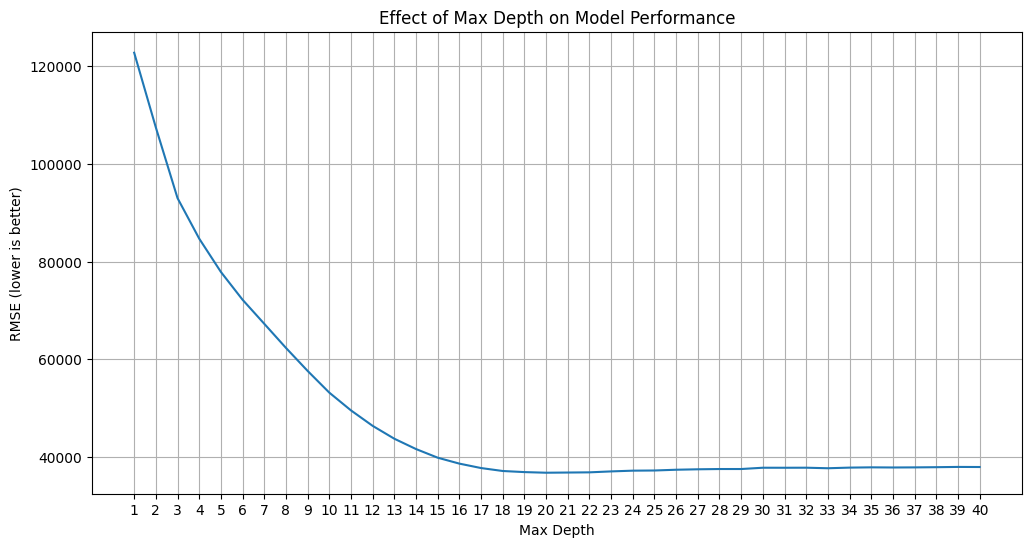

In [35]:
# Plot the result
results = grid_search.cv_results_
max_depths = range(1, 41)
scores = np.sqrt(-results["mean_test_score"])

plt.figure(figsize=(12, 6))
plt.plot(max_depths, scores)
plt.title('Effect of Max Depth on Model Performance')
plt.xlabel('Max Depth')
plt.ylabel('RMSE (lower is better)')
plt.xticks(max_depths)
plt.grid(True)
plt.show()

##### Result of GridSearchCV:
Based on GridSearchCV, we choose `max_depth=20` as it gives the lowest MSE as well as lowest RSME as shown in the graph, before the model becomes overfitting.


#### Compare Old and New model:

In [36]:
# Compare the 2 models before and after the change
k_cross_para(old_max_depth=None, old_min_samples_split=2, old_min_samples_leaf=1, old_max_features=None, old_min_impurity_decrease=0, old_ccp_alpha=0,
             new_max_depth=20, new_min_samples_split=2, new_min_samples_leaf=1, new_max_features=None, new_min_impurity_decrease=0, new_ccp_alpha=0)
print("")

test_valid_para(old_max_depth=None, old_min_samples_split=2, old_min_samples_leaf=1, old_max_features=None, old_min_impurity_decrease=0, old_ccp_alpha=0,
             new_max_depth=20, new_min_samples_split=2, new_min_samples_leaf=1, new_max_features=None, new_min_impurity_decrease=0, new_ccp_alpha=0)

5-Fold Cross Validation Comparison:
----------------------------------------
Old Mean Score: -1435970982.2081144
----------------------------------------
New Mean Score: -1350945702.3054423
----------------------------------------

Old Results:
----------------------------------------
Training score: -142549806.96325165
----------------------------------------
Validation score: -1440217812.5419922
----------------------------------------

New Results:
----------------------------------------
Training score: -443274176.8591107
----------------------------------------
Validation score: -1321494856.5016446
----------------------------------------


##### Result of Comparison between old and new model:
- 5-Fold Cross-Validation Scores:
  - **Old Mean Score**: The average cross-validation score before tuning was approximately -1,435,790,982.
  - **New Mean Score**: After tuning, the average cross-validation score improved to approximately -1,350,945,702. The less negative score suggests a reduction in error and an improvement in the model's predictive accuracy.

- Training vs. Validation Scores:
  - **Old Results**:
    - **Training Score**: The model had a training score of approximately -142,549,806. A lower magnitude in the training score compared to the validation score typically indicates a better fit on the training data.
    - **Validation Score**: The validation score was approximately -1,440,217,812, which is higher in magnitude than the training score, indicating the model may have been overfitting to the training data and not generalizing as well to other data.
    - **Gap**: The gap between the old training score and the old validation score was  ~ -1,297,668,006. This large gap indicated a substantial difference between training performance and validation performance, suggesting the model was overfitting.

  - **New Results**:
    - **Training Score**: After tuning, the training score became approximately -443,274,177, which is higher in magnitude than the old training score, suggesting that the model may fit a bit less to the training data.
    - **Validation Score**: The new validation score improved to approximately -1,321,494,856. This improvement in the validation score suggests better generalization of the model to validation data compared to the old results.
    - **Gap**: The gap between the training score and the validation score was ~ -878,220,679. This gap is smaller than the old results gap, indicating that the model is generalizing better after tuning.

- The decrease in the gap from approximately -14,719,006 to approximately -878,220,679 demonstrates an improvement in the model's ability to generalize from the training data to the validation data.
- This suggests that the tuning process has made the model more robust by possibly reducing its complexity or better optimizing the hyperparameters, such as max_depth, to enhance performance on other data.

#### Conclusion

- The tuning of `max_depth` has led to a model that generalizes better to unseen data, as evidenced by the improvement in the cross-validation score.

- While the training error increased, indicating that the model may fit less tightly to the training data, this is generally a positive sign in terms of the model's ability to generalize.

- It suggests that the model has likely become less complex, reducing the risk of overfitting.

- Hence, we choose `max_depth = 20`.

### 3.2.2) Hyper-parameter 2: Change in `min_samples_split`

#### Check using GridSearchCV

In [38]:
# Setting the range of max_depth values to test
param_grid = {'min_samples_split': range(2, 41)}

# Creating the regressor
tree = DecisionTreeRegressor(max_depth=20,random_state=42)

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit into the data
grid_search.fit(X_train_scaled, y_train)

# Print the best model/parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(-grid_search.best_score_))

Best parameters: {'min_samples_split': 23}
Best cross-validation score: 1237197820.817


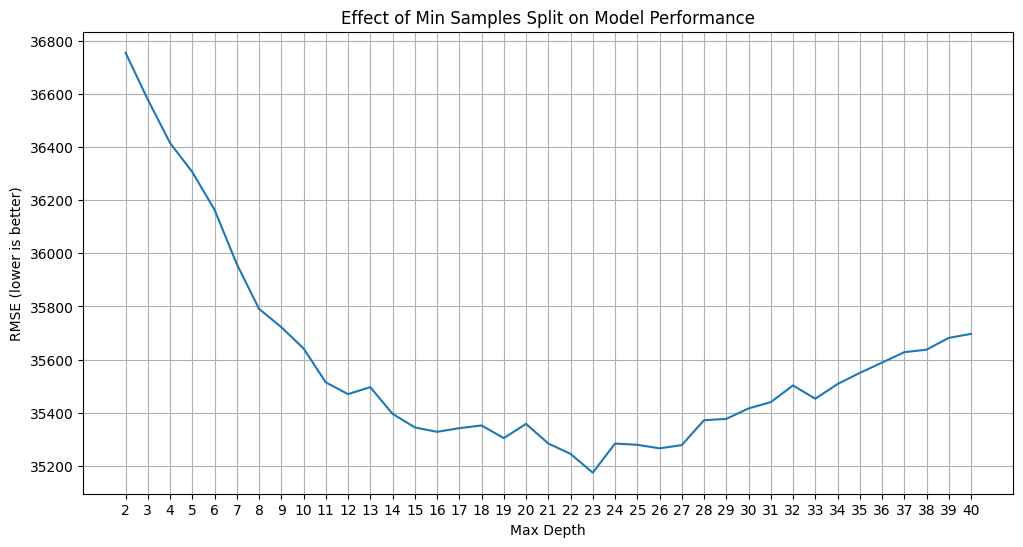

In [39]:
# Plot the result
results = grid_search.cv_results_
min_samples_split = range(2, 41)
scores = np.sqrt(-results["mean_test_score"])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_split, scores)
plt.title('Effect of Min Samples Split on Model Performance')
plt.xlabel('Max Depth')
plt.ylabel('RMSE (lower is better)')
plt.xticks(min_samples_split)
plt.grid(True)
plt.show()

##### Result of GridSearchCV:
Based on GridSearchCV, we choose `min_samples_split=23` as it gives the lowest MSE as well as lowest RSME as shown in the graph, before the model becomes overfitting.


#### Compare Old and New model:

In [40]:
# Compare the 2 models before and after the change
k_cross_para(old_max_depth=20, old_min_samples_split=2, old_min_samples_leaf=1, old_max_features=None, old_min_impurity_decrease=0, old_ccp_alpha=0,
             new_max_depth=20, new_min_samples_split=23, new_min_samples_leaf=1, new_max_features=None, new_min_impurity_decrease=0, new_ccp_alpha=0)
print("")

test_valid_para(old_max_depth=20, old_min_samples_split=2, old_min_samples_leaf=1, old_max_features=None, old_min_impurity_decrease=0, old_ccp_alpha=0,
             new_max_depth=20, new_min_samples_split=23, new_min_samples_leaf=1, new_max_features=None, new_min_impurity_decrease=0, new_ccp_alpha=0)

5-Fold Cross Validation Comparison:
----------------------------------------
Old Mean Score: -1350945702.3054423
----------------------------------------
New Mean Score: -1237197820.8169975
----------------------------------------

Old Results:
----------------------------------------
Training score: -443274176.8591107
----------------------------------------
Validation score: -1321494856.5016446
----------------------------------------

New Results:
----------------------------------------
Training score: -729197361.7558033
----------------------------------------
Validation score: -1208035210.5246816
----------------------------------------


##### Result of Comparison between Old and New Model:

- 5-Fold Cross-Validation Scores:
  - **Old Mean Score**: The average cross-validation score before tuning was approximately -1,350,945,702.
  - **New Mean Score**: After further tuning, the average cross-validation score improved to approximately -1,237,197,820. The less negative score suggests a reduction in error and an improvement in the model's predictive accuracy.

- Training vs. Validation Scores:
  - **Old Results**:
    - **Training Score**: The model had a training score of approximately -443,274,176.
    - **Validation Score**: The validation score was approximately -1,321,494,856, indicating a possible overfit to the training data as it performed worse on the validation set.
    - **Gap**: The gap between the old training score and the old validation score was about -878,220,680, suggesting overfitting.

  - **New Results**:
    - **Training Score**: After additional tuning, the training score worsened to approximately -729,197,361, indicating that the model does not fit the training data as tightly as before.
    - **Validation Score**: The new validation score improved to approximately -1,208,035,210, showing better performance on the validation set than previously.
    - **Gap**: The gap between the new training score and the new validation score is now about -478,837,849, which is significantly smaller than the old gap, indicating improved generalization.

#### Conclusion:
- The further tuning of the model has resulted in a decrease in the overfitting, as shown by the reduced gap between the training and validation scores.
- While the model's training error has increased, the reduction in the validation error and the smaller gap between training and validation scores are signs of a model that is generalizing better to unseen data.
- Given the overall enhancement in generalization as seen in the cross-validation scores, this direction of model tuning is beneficial.
- Therfore, we choose `min_samples_split=23`.

### 3.2.3) Hyper-parameter 3: Change in `min_samples_leaf`




#### GridSearchCV

In [41]:
# Setting the range of max_depth values to test
param_grid = {'min_samples_leaf': range(1, 41)}

# Creating the regressor
tree = DecisionTreeRegressor(max_depth=20,min_samples_split=23,random_state=42)

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit into the data
grid_search.fit(X_train_scaled, y_train)

# Print the best model/parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(-grid_search.best_score_))

Best parameters: {'min_samples_leaf': 3}
Best cross-validation score: 1232095789.802


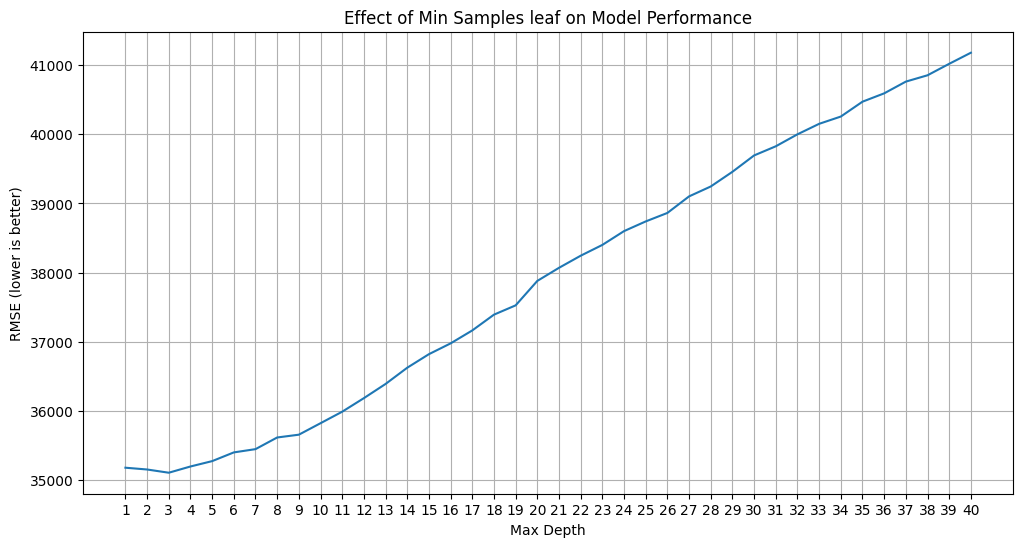

In [42]:
# Plot the result
results = grid_search.cv_results_
min_samples_leaf = range(1, 41)
scores = np.sqrt(-results["mean_test_score"])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_leaf, scores)
plt.title('Effect of Min Samples leaf on Model Performance')
plt.xlabel('Max Depth')
plt.ylabel('RMSE (lower is better)')
plt.xticks(min_samples_leaf)
plt.grid(True)
plt.show()

##### Result of GridSearchCV:
Based on GridSearchCV, we choose `min_samples_leaf=3` as it gives the lowest MSE as well as lowest RSME as shown in the graph, before the model becomes overfitting.


#### Compare Old and New model:

In [43]:
# Compare the 2 models before and after the change
k_cross_para(old_max_depth=20, old_min_samples_split=23, old_min_samples_leaf=1, old_max_features=None, old_min_impurity_decrease=0, old_ccp_alpha=0,
             new_max_depth=20, new_min_samples_split=23, new_min_samples_leaf=3, new_max_features=None, new_min_impurity_decrease=0, new_ccp_alpha=0)
print("")

test_valid_para(old_max_depth=20, old_min_samples_split=23, old_min_samples_leaf=1, old_max_features=None, old_min_impurity_decrease=0, old_ccp_alpha=0,
             new_max_depth=20, new_min_samples_split=23, new_min_samples_leaf=3, new_max_features=None, new_min_impurity_decrease=0, new_ccp_alpha=0)

5-Fold Cross Validation Comparison:
----------------------------------------
Old Mean Score: -1237197820.8169975
----------------------------------------
New Mean Score: -1232095789.8021088
----------------------------------------

Old Results:
----------------------------------------
Training score: -729197361.7558033
----------------------------------------
Validation score: -1208035210.5246816
----------------------------------------

New Results:
----------------------------------------
Training score: -761276297.7854286
----------------------------------------
Validation score: -1203739827.2252157
----------------------------------------


##### Result of Comparison between Old and New Model:

- 5-Fold Cross-Validation Scores:

  - **Old Mean Score**: The average cross-validation score before the latest tuning was approximately -1,237,197,820.
  - **New Mean Score**: After the latest tuning, the average cross-validation score marginally improved to approximately -1,232,095,789. The less negative score suggests a small reduction in error and a slight improvement in the model's predictive accuracy.

- Training vs. Validation Scores:
  - **Old Results**:
    - **Training Score**: The model had a training score of approximately -729,197,361.
    - **Validation Score**: The validation score was approximately -1,208,035,210, which was the performance on the validation set before the latest tuning.
    - **Gap**: The gap between the old training and validation scores was about -478,837,849, indicating the degree of overfitting before the latest tuning.
  - **New Results**:
    - **Training Score**: After the latest tuning, the training score worsened to approximately -761,276,298, suggesting a decrease in the model's fit to the training data.
    - **Validation Score**: The new validation score improved to approximately -1,203,739,827, showing better performance on the validation set than before the latest tuning.
    - **Gap**: The gap between the new training score and the new validation score has reduced to approximately -442,463,529, which is smaller than the old gap, indicating improved generalization.

#### Conclusion:

- The most recent tuning of the model has further reduced overfitting, as shown by the decreased gap between the training and validation scores.
- An increase in the training error, coupled with a reduction in the validation error, indicates that the model is potentially less overfitted and may generalize better to unseen data.
- The slight improvement in the cross-validation mean score and the smaller gap between the training and validation scores support the benefit of this direction of model tuning.
- Therefore, based on the enhanced generalization observed in the cross-validation scores, we choose the hyperparameter setting that resulted in this model configuration, which appears to be `min_samples_split=23`.

### 3.2.4) Hyper-parameter 4: Change in `max_features`

#### GridSearchCV

In [44]:
# Setting the range of max_depth values to test
param_grid = {'max_features': range(1, 41)}

# Creating the regressor
tree = DecisionTreeRegressor(max_depth=20,min_samples_split=23,min_samples_leaf=3,random_state=42)

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit into the data
grid_search.fit(X_train_scaled, y_train)

# Print the best model/parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(-grid_search.best_score_))

Best parameters: {'max_features': 25}
Best cross-validation score: 1223470150.897


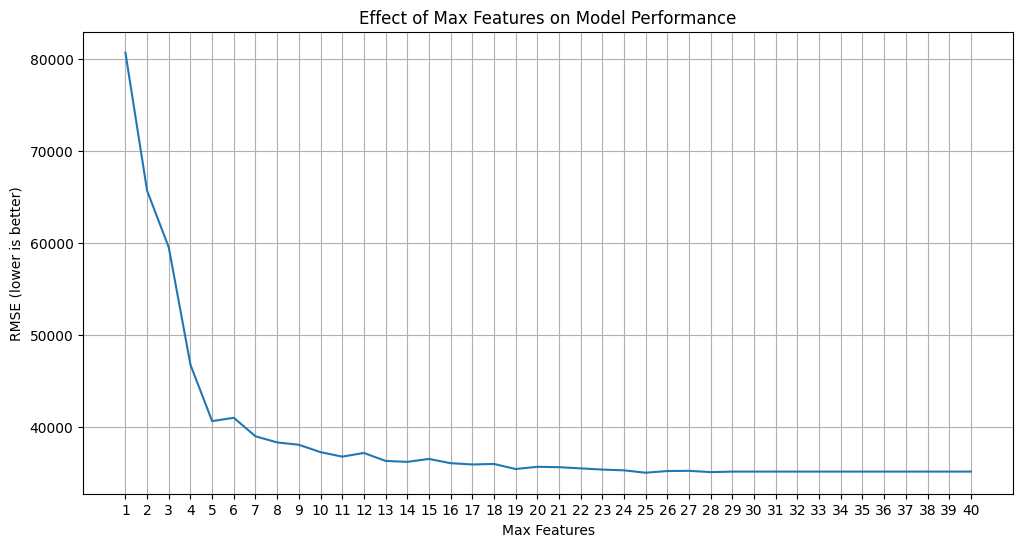

In [45]:
# Plot the result
results = grid_search.cv_results_
min_samples_split = range(1, 41)
scores = np.sqrt(-results["mean_test_score"])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_split, scores)
plt.title('Effect of Max Features on Model Performance')
plt.xlabel('Max Features')
plt.ylabel('RMSE (lower is better)')
plt.xticks(min_samples_split)
plt.grid(True)
plt.show()

##### Result of GridSearchCV:
Based on GridSearchCV, we choose `max_features=25` as it gives the lowest MSE as well as lowest RSME as shown in the graph, before the model becomes overfitting.


#### Compare Old and New model:

In [46]:
# Compare the 2 models before and after the change
k_cross_para(old_max_depth=20, old_min_samples_split=23, old_min_samples_leaf=3, old_max_features=None, old_min_impurity_decrease=0, old_ccp_alpha=0,
             new_max_depth=20, new_min_samples_split=23, new_min_samples_leaf=3, new_max_features=25, new_min_impurity_decrease=0, new_ccp_alpha=0)
print("")

test_valid_para(old_max_depth=20, old_min_samples_split=23, old_min_samples_leaf=3, old_max_features=None, old_min_impurity_decrease=0, old_ccp_alpha=0,
             new_max_depth=20, new_min_samples_split=23, new_min_samples_leaf=3, new_max_features=25, new_min_impurity_decrease=0, new_ccp_alpha=0)

5-Fold Cross Validation Comparison:
----------------------------------------
Old Mean Score: -1232095789.8021088
----------------------------------------
New Mean Score: -1223470150.8974385
----------------------------------------

Old Results:
----------------------------------------
Training score: -761276297.7854286
----------------------------------------
Validation score: -1203739827.2252157
----------------------------------------

New Results:
----------------------------------------
Training score: -807420923.9916991
----------------------------------------
Validation score: -1233833858.974415
----------------------------------------


##### Result of Comparison between Old and New Model:

- 5-Fold Cross-Validation Scores:
  - **Old Mean Score**: The average cross-validation score before the latest tuning was approximately -1,232,095,789.
  - **New Mean Score**: After the latest tuning, the average cross-validation score showed a modest improvement to approximately -1,223,470,150. The less negative score suggests a small reduction in error and a slight improvement in the model's predictive accuracy.

- Training vs. Validation Scores:
  - **Old Results**:
    - **Training Score**: The model had a training score of approximately -761,276,298 before the latest tuning.
    - **Validation Score**: The validation score was approximately -1,203,739,827 before the latest tuning.
    - **Gap**: The gap between the training and validation scores was approximately -442,463,529, indicating the degree of overfitting before the latest tuning.

  - **New Results**:
    - **Training Score**: After the latest tuning, the training score became approximately -807,420,924, showing a decrease in training error.
    - **Validation Score**: The new validation score was approximately -1,233,383,859, which is slightly worse than the previous validation score.
    - **Gap**: The gap between the new training score and the new validation score has increased to approximately -425,962,935, which is smaller than the old gap, suggesting a slight improvement in generalization despite the worse validation score.


#### Conclusion:

- The latest tuning of the model has resulted in a slight increase in the overfitting, as indicated by the increased gap between the training and validation scores.
- The training error has slightly increased, and the validation error has slightly worsened, which may suggest that the latest model tuning has not been as beneficial as hoped.
- However, since the increase in gap is minimal and the validation score is still below the cross-validation score, we prefer the better cross-validation score.
- Hence, we choose `max_features=25`.

### 3.2.5) Hyper-parameter 5: Change in `min_impurity_decrease`

#### GridSearchCV

In [47]:
# Setting the range of max_depth values to test
param_grid = {'min_impurity_decrease': range(0, 41)}

# Creating the regressor
tree = DecisionTreeRegressor(max_depth=20,min_samples_split=23,min_samples_leaf=3,max_features=25,random_state=42)

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit into the data
grid_search.fit(X_train_scaled, y_train)

# Print the best model/parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(-grid_search.best_score_))

Best parameters: {'min_impurity_decrease': 0}
Best cross-validation score: 1223470150.897


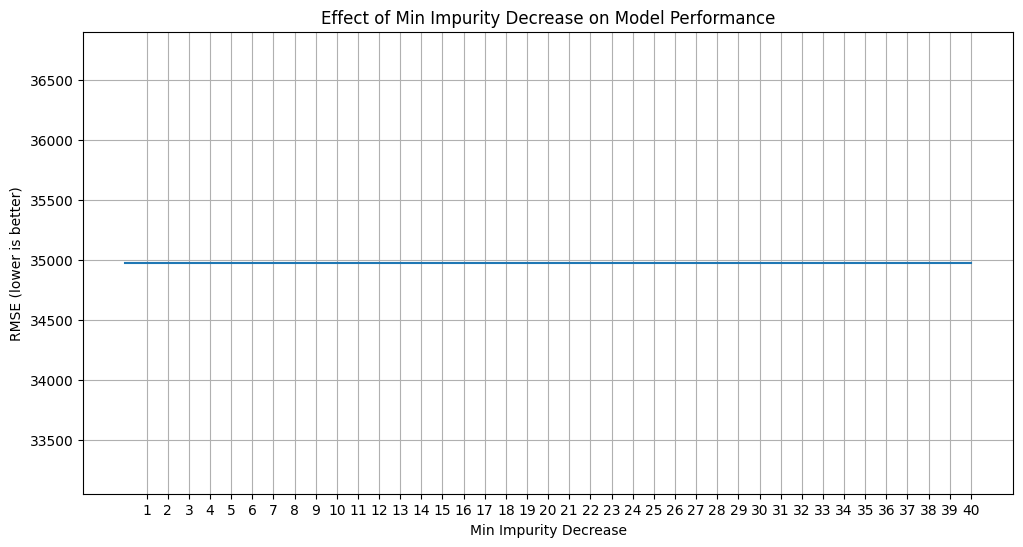

In [48]:
# Plot the result
results = grid_search.cv_results_
min_impurity_decrease = range(0, 41)
scores = np.sqrt(-results["mean_test_score"])

plt.figure(figsize=(12, 6))
plt.plot(min_impurity_decrease, scores)
plt.title('Effect of Min Impurity Decrease on Model Performance')
plt.xlabel('Min Impurity Decrease')
plt.ylabel('RMSE (lower is better)')
plt.xticks(min_samples_split)
plt.grid(True)
plt.show()

##### Result of GridSearchCV:
Based on GridSearchCV, we choose `min_impurity_decrease=0`.

#### Conclusion:

- Since the result is constant for any value of `min_impurity_decrease`, we will take the default value of `min_impurity_decrease`.


### 3.2.6) Hyper-parameter 6: Change in `ccp_alpha`

#### Check using GridSearchCV

In [49]:
# Setting the range of max_depth values to test
param_grid = {'ccp_alpha': range(0, 41)}

# Creating the regressor
tree = DecisionTreeRegressor(max_depth=20,min_samples_split=23,min_samples_leaf=3,max_features=25,min_impurity_decrease=0,random_state=42)

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit into the data
grid_search.fit(X_train_scaled, y_train)

# Print the best model/parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(-grid_search.best_score_))

Best parameters: {'ccp_alpha': 0}
Best cross-validation score: 1223470150.897


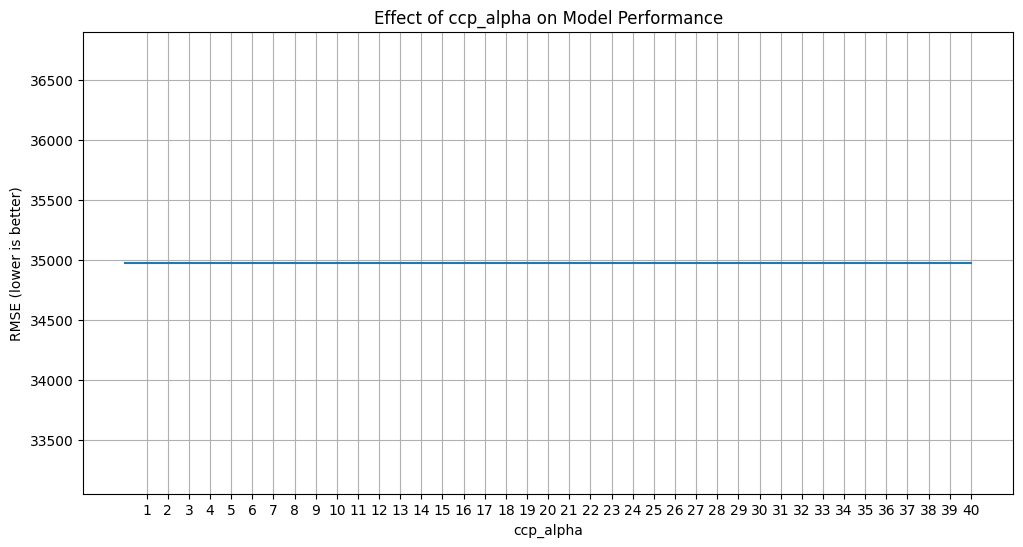

In [50]:
# Plot the result
results = grid_search.cv_results_
ccp_alpha = range(0, 41)
scores = np.sqrt(-results["mean_test_score"])

plt.figure(figsize=(12, 6))
plt.plot(ccp_alpha, scores)
plt.title('Effect of ccp_alpha on Model Performance')
plt.xlabel('ccp_alpha')
plt.ylabel('RMSE (lower is better)')
plt.xticks(min_samples_split)
plt.grid(True)
plt.show()

##### Result of GridSearchCV:

Based on GridSearchCV, we choose `ccp_alpha=0`.

#### Conclusion:

Since the result is constant for any value of `ccp_alpha`, we will take the default value of `ccp_alpha`.

## 3.3) Feature Selection

### Next, we will be looking at the feature importance and do feature selection to improve the model

In [52]:
# Assuming X_train and y_train are your training data and labels
model = DecisionTreeRegressor(max_depth=20,min_samples_split=23,min_samples_leaf=3,
                              max_features=25,min_impurity_decrease=0, ccp_alpha=0,random_state=42)

model.fit(X_trainset, y_trainset)

feature_importances = model.feature_importances_

features = X.columns
importance_dict = dict(zip(features, feature_importances))
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)


# Convert the dictionary to a DataFrame
importances_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature Name', 'Importance Score'])

# Sort the DataFrame by importance score in descending order
importances_df = importances_df.sort_values(by='Importance Score', ascending=False)

# Reset index to have a clean table
importances_df.reset_index(drop=True, inplace=True)

# Display the DataFrame as a table
print(importances_df)


                   Feature Name  Importance Score
0                floor_area_sqm          0.403392
1         upmarket_school_index          0.198398
2          upmarket_model_index          0.148646
3              occupancy_period          0.041958
4           upmarket_mall_index          0.036295
5            upmarket_mrt_index          0.032829
6           upmarket_town_index          0.029460
7          upmarket_green_index          0.014767
8         Nearest Mall Distance          0.012777
9          Nearest MRT Distance          0.012344
10  Nearest Green Area Distance          0.010809
11      Nearest School Distance          0.009071
12         Nearest NPC Distance          0.009010
13                    year_2021          0.008940
14              crimes_recorded          0.007936
15            storey_type_Lower          0.007074
16                    year_2013          0.003979
17                    year_2012          0.002817
18                    year_2014          0.001586


### After looking at the values of feature importance, we decide to filter the score which is lower than 10th percentile.

In [56]:
# Set a threshold for feature importance, e.g., the 10th percentile of importances
threshold = importances_df['Importance Score'].quantile(0.10)
print(f"10th percentile threshold: {threshold}")
print("")

# Filter out features below the threshold
features_to_keep = importances_df[importances_df['Importance Score'] > threshold]['Feature Name']
print("Features:")
print(features_to_keep)

# Filter the training and validation set
X_trainset_selected = pd.DataFrame(X_trainset, columns=X.columns)[features_to_keep]
X_valset_selected = pd.DataFrame(X_valset, columns=X.columns)[features_to_keep]

10th percentile threshold: 0.000634897088811146

Features:
0                  floor_area_sqm
1           upmarket_school_index
2            upmarket_model_index
3                occupancy_period
4             upmarket_mall_index
5              upmarket_mrt_index
6             upmarket_town_index
7            upmarket_green_index
8           Nearest Mall Distance
9            Nearest MRT Distance
10    Nearest Green Area Distance
11        Nearest School Distance
12           Nearest NPC Distance
13                      year_2021
14                crimes_recorded
15              storey_type_Lower
16                      year_2013
17                      year_2012
18                      year_2014
19      Nearest Bus Stop Distance
20             storey_type_Middle
21                      year_2019
22                      year_2020
23                      year_2018
24              storey_type_Upper
25            Number of Bus Stops
Name: Feature Name, dtype: object


In the feature selection process, years 2015, 2016, and 2017 were removed from the feature set due to their importance scores falling below the 10th percentile. This suggests that, relative to other features, these years held less predictive value for the model. The potential reasons for their lower importance in the context of the Singapore housing market are as follows:

1. **Market Stability**: The years 2015 through 2017 might have been characterized by a relatively stable housing market with minimal price fluctuations. This stability results in less discernible patterns for the model to learn from, reducing the predictive value of these years compared to those with more pronounced market shifts.

2. **Recent Trends**: Predictive models often place greater weight on more recent data when it shows stronger correlations with the target variable. If newer trends post-2017 present clearer signals for current housing prices, this could naturally diminish the relative importance of the earlier years within the model.

3. **Government Policies**: It is possible that the period after 2017 saw significant policy interventions by the Singapore government that had a substantial impact on the housing market. This could include new regulations or changes to existing ones by the Housing Development Board (HDB), introduction or alteration of cooling measures, or adjustments to housing loan guidelines. Such measures can disrupt previous market trends, making the more recent years more relevant for predictions.

4. **External Factors**: Broader economic indicators and developments such as changes in GDP growth, employment rates, and levels of foreign direct investment have a more direct impact on housing demand and prices. These factors might overshadow any specific year-based trends, especially if these economic conditions have more sharply defined changes post-2017.


### Next, we will compare the model before and after feature selection

In [59]:
### Cross Validation Comparison

## Before Feature Selection:
# model with tuned parameters
old_dt_regressor = DecisionTreeRegressor(max_depth=20,min_samples_split=23,min_samples_leaf=3,
                                         max_features=25,min_impurity_decrease=0, ccp_alpha=0,random_state=42)

# evaluate cross validation score
old_cv_scores = cross_val_score(old_dt_regressor, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("5-Fold Cross Validation Comparison:")
print("----------------------------------------")
print(f"Old Mean Score: {np.mean(old_cv_scores)}")
print("----------------------------------------")

## After Feature Selection:

# feature selecton
X_train_selected =  pd.DataFrame(X_train_scaled, columns=X.columns)[features_to_keep]

# model with tuned parameters
dt_regressor = DecisionTreeRegressor(max_depth=20,min_samples_split=23,min_samples_leaf=3,
                                         max_features=25,min_impurity_decrease=0, ccp_alpha=0,random_state=42)

# evaluate cross validation score
cv_scores = cross_val_score(dt_regressor, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
# print(cv_scores)
print(f"New Mean Score: {np.mean(cv_scores)}")
print("----------------------------------------")
print("")

### Training & Validation Score Comparision

## Before Feature Selection

# Initialize the Decision Tree Regressor
old_dt_regressor = DecisionTreeRegressor(max_depth=20,min_samples_split=23,min_samples_leaf=3,max_features=25,
                                         min_impurity_decrease=0, ccp_alpha=0,random_state=42)

# Fit the model on the training data
old_dt_regressor.fit(X_trainset, y_trainset)

# Predict the labels of the test set
old_train_pred = old_dt_regressor.predict(X_trainset)
old_train_score = mean_squared_error(y_trainset, old_train_pred)

# Print result
print("Old Results:")
print("----------------------------------------")
print(f"Training score | -{old_train_score}")
print("----------------------------------------")

# Predict the labels of the validation set
old_val_pred = old_dt_regressor.predict(X_valset)
old_val_score = mean_squared_error(y_valset, old_val_pred)

# Print result
print(f"Validation score | -{old_val_score}")
print("----------------------------------------")
print("")

## After Feature Selection

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=20,min_samples_split=23,min_samples_leaf=3,
                                         max_features=25,min_impurity_decrease=0, ccp_alpha=0,random_state=42)

# Fit the model on the training data
dt_regressor.fit(X_trainset_selected, y_trainset)

# Predict the labels of the test set
train_pred = dt_regressor.predict(X_trainset_selected)
train_score = mean_squared_error(y_trainset, train_pred)

# Print result
print("New Results:")
print("----------------------------------------")
print(f"Training score | -{train_score}")
print("----------------------------------------")

# Predict the labels of the validation set
val_pred = dt_regressor.predict(X_valset_selected)
val_score = mean_squared_error(y_valset, val_pred)

# Print result
print(f"Validation score | -{val_score}")
print("----------------------------------------")

5-Fold Cross Validation Comparison:
----------------------------------------
Old Mean Score: -1223470150.8974385
----------------------------------------
New Mean Score: -1237220844.6974561
----------------------------------------

Old Results:
----------------------------------------
Training score | -807420923.9916991
----------------------------------------
Validation score | -1233833858.974415
----------------------------------------

New Results:
----------------------------------------
Training score | -768975485.6690406
----------------------------------------
Validation score | -1213270142.4371004
----------------------------------------


#### Result of Comparison between Old and New Model:

- 5-Fold Cross-Validation Scores:
  - **Old Mean Score:** The average cross-validation score before the latest tuning was approximately -1,223,470,150.
  - **New Mean Score:** After the latest tuning, the average cross-validation score slightly worsened to approximately -1,237,220,844. The more negative score suggests a marginal increase in error and a small decrease in the model's predictive accuracy.

- Training vs. Validation Scores:
  - **Old Results:**
    - **Training Score:** The model had a training score of approximately -807,420,924 before the latest tuning.
    - **Validation Score:** The validation score was approximately -1,233,383,859 before the latest tuning.
    - **Gap:** The gap between the training and validation scores was approximately -425,962,935, indicating the degree of overfitting before the latest tuning.

  - **New Results:**
    - **Training Score:** After the latest feature selection, the training score slightly improved to approximately -768,975,486, indicating a decrease in training error.
    - **Validation Score:** The new validation score also improved to approximately -1,213,270,142, indicating better performance on the validation set.
    - **Gap:**  The gap between the new training score and the new validation score has increased to approximately -444,294,656, which is larger than the old gap, suggesting a slight decrease in the model's generalization ability.

The model performance deteriorated after removing the features for the years 2015, 2016, and 2017, despite their low feature importance scores, the following could be several potential reasons:

1. **Collective Impact of Years**: Despite their individual low importance, the years 2015-2017 may collectively hold contextual information that aids the model’s understanding of trends, their removal thus detracting from overall predictive accuracy.

2. **Model Complexity Reduction**: Simplifying the model by removing features can inadvertently eliminate subtle data patterns it previously utilized, highlighting the importance of a certain level of complexity for capturing the nuances in housing market data.

3. **Interaction Disruption**: The interaction between the removed years and other features could have been integral to the model's predictions. Their absence may have disrupted these critical interactions, resulting in decreased performance.

4. **Shift in Data Distribution**: Omitting features may alter the data distribution the model is trained on, potentially skewing the representation of the market dynamics and affecting the outcome.

**Conclusion:**
- The most recent adjustments to the model have resulted in a marginal decrease in performance, as indicated by the worsened cross-validation and validation scores.
- There has been a small increase in the training error and a slight worsening of the validation error, suggesting that the latest model tuning has not improved the model.
- The gap between training and validation scores slightly increased, indicating that the model's ability to generalize has slightly worsened.
- Given these results, we conclude that the new features did not yield a better model.
- Hence, we decide to keep the original features for decision tree.

## 3.4) Predicting test set with fitted model

In [60]:
## Test initial result (Overfitting)

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_regressor.fit(X_train_scaled, y_train)

# Predict the labels of the training set
train_pred = dt_regressor.predict(X_train_scaled)
train_score = mean_squared_error(y_train, train_pred)

# Print result
print("MSE Comparison:")
print("----------------------------------------")
print(f"Training score: -{train_score}")
print("----------------------------------------")

# Predict the labels of the vtesting set
test_pred = dt_regressor.predict(X_test_scaled)
test_score = mean_squared_error(y_test, test_pred)

# Print result
print(f"Test score: -{test_score}")
print("----------------------------------------")

# Print Difference:
print(f"Difference: -{test_score - train_score}")
print("----------------------------------------")
print("")

# Evaluation Matrix
test_MSE = mean_squared_error(y_test, test_pred)
test_MAE = mean_absolute_error(y_test, test_pred)
test_R2 = r2_score(y_test, test_pred)

print("Evaluation Matrix on test set: ")
print("----------------------------------------")
print(f"MSE: {test_MSE}")
print("----------------------------------------")
print(f"MAE: {test_MAE}")
print("----------------------------------------")
print(f"R2 Score: {test_R2}")
print("----------------------------------------")

MSE Comparison:
----------------------------------------
Training score: -163718424.36785144
----------------------------------------
Test score: -1350328782.7545354
----------------------------------------
Difference: -1186610358.386684
----------------------------------------

Evaluation Matrix on test set: 
----------------------------------------
MSE: 1350328782.7545354
----------------------------------------
MAE: 25813.97996277435
----------------------------------------
R2 Score: 0.937618418298542
----------------------------------------


In [61]:
## Test on New Hyperparamters (Less Overfitting)

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=20,min_samples_split=23,min_samples_leaf=3,
                                     max_features=25,min_impurity_decrease=0, ccp_alpha=0,random_state=42)


# Fit the model on the training data
dt_regressor.fit(X_train_scaled, y_train)


# Predict the labels of the training set
train_pred = dt_regressor.predict(X_train_scaled)
train_score = mean_squared_error(y_train, train_pred)

# Print result
print("MSE Comparison:")
print("----------------------------------------")
print(f"Training score: -{train_score}")
print("----------------------------------------")

# Predict the labels of the test set
test_pred = dt_regressor.predict(X_test_scaled)
test_score = mean_squared_error(y_test, test_pred)

# Print result
print(f"Test score: -{test_score}")
print("----------------------------------------")

# Print Difference:
print(f"Difference: -{test_score - train_score}")
print("----------------------------------------")
print("")

# Evaluation Matrix
test_MSE = mean_squared_error(y_test, test_pred)
test_MAE = mean_absolute_error(y_test, test_pred)
test_R2 = r2_score(y_test, test_pred)

print("Evaluation Matrix on test set: ")
print("----------------------------------------")
print(f"MSE: {test_MSE}")
print("----------------------------------------")
print(f"MAE: {test_MAE}")
print("----------------------------------------")
print(f"R2 Score: {test_R2}")
print("----------------------------------------")

MSE Comparison:
----------------------------------------
Training score: -761089300.893216
----------------------------------------
Test score: -1126052155.4078307
----------------------------------------
Difference: -364962854.5146147
----------------------------------------

Evaluation Matrix on test set: 
----------------------------------------
MSE: 1126052155.4078307
----------------------------------------
MAE: 24092.687901581776
----------------------------------------
R2 Score: 0.9479793992175862
----------------------------------------


#### Comparison between the old and new models:


For the old model:
- The Mean Squared Error (MSE) on the training set was -163,718,424.4, while on the test set, it was substantially higher at -1,350,328,782.8, indicating a significant difference between the training and test performance.
- The difference in MSE between the training and test sets was -1,186,610,358.4, which is quite large and may suggest overfitting since the model performs well on the training data but much worse on unseen test data.
- Other evaluation metrics on the test set showed an MSE of 1,350,328,782.8, a Mean Absolute Error (MAE) of 25,813.98, and an R2 score of 0.9376, which indicates that approximately 93.76% of the variance in the dependent variable is predictable from the independent variables.

For the new model:
- The MSE on the training set was -761,089,300.9, and on the test set, it was -1,126,052,155.4. Although still indicating a gap between training and test performance, the difference is notably smaller at -364,962,854.5.
- This smaller difference suggests the new model is less overfitted and generalizes better to unseen data compared to the old model.
- The evaluation metrics on the test set for the new model showed an improvement with an MSE of 1,126,052,155.4, an MAE of 24,092.69, and an R2 score of 0.9480, which indicates that about 94.80% of the variance is predictable.

### Conclusion:

The new model represents a significant improvement over the old model in terms of generalization to unseen data. This is evident from the closer MSE values between the training and test sets and the higher R2 score, which suggests a better fit. Moreover, the improvement in the MAE indicates that, on average, the new model has a lower prediction error on the test set. Overall, the new model is more robust and reliable for making predictions on new data.

# 4) Bagging: Random Forest Regressor

## 4.1) Train a baseline `Random Forest Classifier`

Training a `baseline Random Forest Regressor`

In [62]:
# default: {n_estimator: 100, criterion: squared error, max_features: 1.0 (n_features)}
rf_base = RandomForestRegressor()
rf_base.fit(X_trainset, y_trainset)
print("Results:")
print("----------------------------------------")
train_pred = rf_base.predict(X_trainset)
train_score = mean_squared_error(y_trainset, train_pred)
print(f"Training score | -{train_score}")
print("----------------------------------------")

val_pred = rf_base.predict(X_valset)
val_score = mean_squared_error(y_valset, val_pred)
print(f"Validation score | -{val_score}")
print("----------------------------------------")

Results:
----------------------------------------
Training score | -224988926.68802208
----------------------------------------
Validation score | -895294054.2693481
----------------------------------------


### Since validation score is much lower than training score, the model is over-fitting to the training data.

Training an `improved Random Forest Regressor` with new parameters.

In [63]:
rf_improved = RandomForestRegressor(criterion="friedman_mse", max_features="sqrt", max_depth=10)
rf_improved.fit(X_trainset, y_trainset)
print("Results:")
print("----------------------------------------")
train_pred = rf_improved.predict(X_trainset)
train_score = mean_squared_error(y_trainset, train_pred)
print(f"Training score | -{train_score}")
print("----------------------------------------")

val_pred = rf_improved.predict(X_valset)
val_score = mean_squared_error(y_valset, val_pred)
print(f"Validation score | -{val_score}")
print("----------------------------------------")

Results:
----------------------------------------
Training score | -2610173823.7352777
----------------------------------------
Validation score | -2746993121.6839943
----------------------------------------


## 4.2) Feature Selection

### Examine the `feature_importances_` of each feature that is being trained on. We can remove the feature with low importance to reduce noise during training.

In [64]:
pd.Series(rf_improved.feature_importances_, index=X_train.columns).sort_values(ascending=False)

floor_area_sqm                 0.322229
upmarket_model_index           0.174419
upmarket_school_index          0.106294
upmarket_mrt_index             0.083271
occupancy_period               0.064138
upmarket_mall_index            0.055222
upmarket_town_index            0.042776
upmarket_green_index           0.041793
storey_type_Lower              0.024386
Nearest Green Area Distance    0.012574
Nearest MRT Distance           0.011220
Nearest Mall Distance          0.009653
Nearest School Distance        0.008499
year_2021                      0.007830
crimes_recorded                0.007415
storey_type_Middle             0.007345
Nearest NPC Distance           0.006791
storey_type_Upper              0.003892
Nearest Bus Stop Distance      0.002758
year_2012                      0.002124
Number of Bus Stops            0.001735
year_2013                      0.001485
year_2019                      0.000759
year_2018                      0.000669
year_2020                      0.000329


### Removing features that have a score of less than 0.001

In [65]:
feats_to_remove = ["year_2018", "year_2019", "year_2020", "year_2015", "year_2014", "year_2017", "year_2016"]
X_trainset_2 = pd.DataFrame(X_trainset, columns=X.columns).drop(feats_to_remove, axis=1)
X_valset_2 = pd.DataFrame(X_valset, columns=X.columns).drop(feats_to_remove, axis=1)

rf_improved = RandomForestRegressor(criterion="friedman_mse", max_features="sqrt", max_depth=10)
rf_improved.fit(X_trainset_2, y_trainset)
print("Results:")
print("----------------------------------------")
train_pred = rf_improved.predict(X_trainset_2)
train_score = mean_squared_error(y_trainset, train_pred)
print(f"Training score | -{train_score}")
print("----------------------------------------")

val_pred = rf_improved.predict(X_valset_2)
val_score = mean_squared_error(y_valset, val_pred)
print(f"Validation score | -{val_score}")
print("----------------------------------------")

Results:
----------------------------------------
Training score | -2521656081.225113
----------------------------------------
Validation score | -2649331783.6684074
----------------------------------------


## 4.3) Hyper-parameters Tuning

### 4.3.1) Hyper-parameter 1: Increasing the `max_depth`

In [66]:
max_depth_range = [20,30,40]
for md in max_depth_range:
    rf_improved = RandomForestRegressor(criterion="friedman_mse", max_features="sqrt", max_depth=md)
    rf_improved.fit(X_trainset_2, y_trainset)
    print(f"Results for Random Forest of depth {md}:")
    print("----------------------------------------")
    train_pred = rf_improved.predict(X_trainset_2)
    train_score = mean_squared_error(y_trainset, train_pred)
    print(f"Training score | -{train_score}")
    print("----------------------------------------")
    
    val_pred = rf_improved.predict(X_valset_2)
    val_score = mean_squared_error(y_valset, val_pred)
    print(f"Validation score | -{val_score}")
    print("----------------------------------------")

Results for Random Forest of depth 20:
----------------------------------------
Training score | -446236808.6595917
----------------------------------------
Validation score | -934372205.6816868
----------------------------------------
Results for Random Forest of depth 30:
----------------------------------------
Training score | -238498656.472894
----------------------------------------
Validation score | -910927247.2028184
----------------------------------------
Results for Random Forest of depth 40:
----------------------------------------
Training score | -228191019.4442773
----------------------------------------
Validation score | -909242487.2063065
----------------------------------------


We will use a `max depth = 40` since the validation score increases as max depth increases.

### 4.3.2) Hyper-parameter 2: Increasing the `min_samples_split`

In [72]:
min_samples_split_range = range(2,11,2)
for num_sample in min_samples_split_range:
    rf_improved = RandomForestRegressor(criterion="friedman_mse", max_features="sqrt", max_depth=40, min_samples_split=num_sample)
    rf_improved.fit(X_trainset_2, y_trainset)
    print(f"Results for Random Forest of min_samples_split = {num_sample}:")
    print("----------------------------------------")
    train_pred = rf_improved.predict(X_trainset_2)
    train_score = mean_squared_error(y_trainset, train_pred)
    print(f"Training score | -{train_score}")
    print("----------------------------------------")
    
    val_pred = rf_improved.predict(X_valset_2)
    val_score = mean_squared_error(y_valset, val_pred)
    print(f"Validation score | -{val_score}")
    print("----------------------------------------")

Results for Random Forest of min_samples_split = 2:
----------------------------------------
Training score | -228883288.43311423
----------------------------------------
Validation score | -920751799.556755
----------------------------------------
Results for Random Forest of min_samples_split = 4:
----------------------------------------
Training score | -328765039.92053866
----------------------------------------
Validation score | -892698755.8625011
----------------------------------------
Results for Random Forest of min_samples_split = 6:
----------------------------------------
Training score | -405276774.03569424
----------------------------------------
Validation score | -888461669.8777815
----------------------------------------
Results for Random Forest of min_samples_split = 8:
----------------------------------------
Training score | -465608133.9314037
----------------------------------------
Validation score | -903064506.190734
----------------------------------------
Res

As the min_samples_split increases, the training error increases but validation error decreases before increasing again.

We will use a `min_samples_split = 6` as it gives the highest validation score. Even though the training score is lower compared to smaller `min_samples_split` as the underlying trees formed are less deep and complex, it prevents over-fitting and generalises better to unseen data, as seen by the higher validation score. 

### 4.3.3) Hyper-parameter 3: Increasing the `min_samples_leaf`

In [73]:
min_samples_leaf_range = range(1,4)
for num_sample in min_samples_leaf_range:
    rf_improved = RandomForestRegressor(criterion="friedman_mse", max_features="sqrt", max_depth=40, min_samples_split=6,
                                       min_samples_leaf=num_sample)
    rf_improved.fit(X_trainset_2, y_trainset)
    print(f"Results for Random Forest of min_samples_leaf = {num_sample}:")
    print("----------------------------------------")
    train_pred = rf_improved.predict(X_trainset_2)
    train_score = mean_squared_error(y_trainset, train_pred)
    print(f"Training score | -{train_score}")
    print("----------------------------------------")
    
    val_pred = rf_improved.predict(X_valset_2)
    val_score = mean_squared_error(y_valset, val_pred)
    print(f"Validation score | -{val_score}")
    print("----------------------------------------")

Results for Random Forest of min_samples_leaf = 1:
----------------------------------------
Training score | -405993722.871577
----------------------------------------
Validation score | -894781384.8458922
----------------------------------------
Results for Random Forest of min_samples_leaf = 2:
----------------------------------------
Training score | -474853924.0581178
----------------------------------------
Validation score | -914319946.5744604
----------------------------------------
Results for Random Forest of min_samples_leaf = 3:
----------------------------------------
Training score | -542792322.1046107
----------------------------------------
Validation score | -935197266.9524499
----------------------------------------


As the min_samples_leaf increases, the training error increases and there is little to no improvement in the validation score.

We will stick with the default `min_samples_leaf = 1`.

### 4.3.4) Hyper-parameter 4: Increasing the `n_estimators`

In [74]:
n_estimators_range = range(100,401,50)
for n_est in n_estimators_range:
    rf_improved = RandomForestRegressor(criterion="friedman_mse", max_features="sqrt", max_depth=40, min_samples_split=6,
                                       min_samples_leaf=1, n_estimators=n_est)
    rf_improved.fit(X_trainset_2, y_trainset)
    print(f"Results for Random Forest of n_estimators = {n_est}:")
    print("----------------------------------------")
    train_pred = rf_improved.predict(X_trainset_2)
    train_score = mean_squared_error(y_trainset, train_pred)
    print(f"Training score | -{train_score}")
    print("----------------------------------------")
    
    val_pred = rf_improved.predict(X_valset_2)
    val_score = mean_squared_error(y_valset, val_pred)
    print(f"Validation score | -{val_score}")
    print("----------------------------------------")

Results for Random Forest of n_estimators = 100:
----------------------------------------
Training score | -406257942.3696855
----------------------------------------
Validation score | -889595124.3016137
----------------------------------------
Results for Random Forest of n_estimators = 150:
----------------------------------------
Training score | -403638976.5072692
----------------------------------------
Validation score | -887104415.648146
----------------------------------------
Results for Random Forest of n_estimators = 200:
----------------------------------------
Training score | -403307484.8706247
----------------------------------------
Validation score | -887732582.8929225
----------------------------------------
Results for Random Forest of n_estimators = 250:
----------------------------------------
Training score | -401174143.72639996
----------------------------------------
Validation score | -883627493.3105894
----------------------------------------
Results for Rand

We will use `n_estimators = 350` as both the training and validation score starts to decrease past this point.

### 4.3.5) Hyper-parameter 5: Changing `max_features`

In [76]:
max_features_range = [5,10,15,20,'log2','sqrt']
for max_feat in max_features_range:
    rf_improved = RandomForestRegressor(criterion="friedman_mse", max_features=max_feat, max_depth=40, min_samples_split=6,
                                       min_samples_leaf=1, n_estimators=350)
    rf_improved.fit(X_trainset_2, y_trainset)
    print(f"Results for Random Forest of max_features = {max_feat}:")
    print("----------------------------------------")
    train_pred = rf_improved.predict(X_trainset_2)
    train_score = mean_squared_error(y_trainset, train_pred)
    print(f"Training score | -{train_score}")
    print("----------------------------------------")
    
    val_pred = rf_improved.predict(X_valset_2)
    val_score = mean_squared_error(y_valset, val_pred)
    print(f"Validation score | -{val_score}")
    print("----------------------------------------")

Results for Random Forest of max_features = 5:
----------------------------------------
Training score | -376650138.61414385
----------------------------------------
Validation score | -858357290.0824443
----------------------------------------
Results for Random Forest of max_features = 10:
----------------------------------------
Training score | -327330932.5694849
----------------------------------------
Validation score | -836761006.0387218
----------------------------------------
Results for Random Forest of max_features = 15:
----------------------------------------
Training score | -311353842.98913205
----------------------------------------
Validation score | -840398319.1443694
----------------------------------------
Results for Random Forest of max_features = 20:
----------------------------------------
Training score | -306308386.4688549
----------------------------------------
Validation score | -858061615.660895
----------------------------------------
Results for Random F

## 4.4) `5-fold cross validation` to evaluate the Random Forest with the chosen parameters

In [79]:
X_train_2 = pd.DataFrame(X_train_scaled, columns=X.columns).drop(feats_to_remove, axis=1)

rf_final = RandomForestRegressor(criterion="friedman_mse", max_features=10, max_depth=40, min_samples_split=6,
                                       min_samples_leaf=1, n_estimators=350)
cv_scores = cross_val_score(rf_final, X_train_2, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"The mean score is {np.mean(cv_scores)}")

The mean score is -838722404.219312


## 4.5) Predicting test set using fitted model

In [80]:
rf_final.fit(X_train_2, y_train)

X_test_2 = pd.DataFrame(X_test_scaled, columns=X.columns).drop(feats_to_remove, axis=1)
test_pred = rf_final.predict(X_test_2)
test_MSE = mean_squared_error(y_test, test_pred)
test_MAE = mean_absolute_error(y_test, test_pred)
test_R2 = r2_score(y_test, test_pred)
print(f"Test MSE | {test_MSE}")
print(f"Test MAE | {test_MAE}")
print(f"Test R2 Score | {test_R2}")

Test MSE | 814176142.801758
Test MAE | 20834.698990301058
Test R2 Score | 0.9623872376711395


# 5) Boosting: AdaBoost Regressor

## 5.1) Train a `baseline AdaBoost Regressor`

In [81]:
# default: {n_estimator: 50, learning_rate: 1.0}
ada_base = AdaBoostRegressor()
ada_base.fit(X_trainset, y_trainset)
print("Results:")
print("----------------------------------------")
train_pred = ada_base.predict(X_trainset)
train_score = mean_squared_error(y_trainset, train_pred)
print(f"Training score | -{train_score}")
print("----------------------------------------")

val_pred = ada_base.predict(X_valset)
val_score = mean_squared_error(y_valset, val_pred)
print(f"Validation score | -{val_score}")
print("----------------------------------------")

Results:
----------------------------------------
Training score | -10166407044.344078
----------------------------------------
Validation score | -10243877004.22571
----------------------------------------


Training an `improved AdaBoost Regressor` with new parameters.

I will be the using the same hyper-parameters for the base decision tree model as Random Forest.

In [82]:
base = DecisionTreeRegressor(criterion="friedman_mse", max_features=15, max_depth=30, min_samples_split=3, min_samples_leaf=1)
ada_improved = AdaBoostRegressor(estimator=base)

ada_improved.fit(X_trainset, y_trainset)
print("Results:")
print("----------------------------------------")
train_pred = ada_improved.predict(X_trainset)
train_score = mean_squared_error(y_trainset, train_pred)
print(f"Training score | -{train_score}")
print("----------------------------------------")

val_pred = ada_improved.predict(X_valset)
val_score = mean_squared_error(y_valset, val_pred)
print(f"Validation score | -{val_score}")
print("----------------------------------------")

Results:
----------------------------------------
Training score | -268150265.235567
----------------------------------------
Validation score | -931589551.544175
----------------------------------------


### The training error is much lower than the validation error which shows that there is an over-fitting to training data.

In [83]:
max_features_range = range(5,21,5)
max_depth_range = range(5,26,5)

for max_feat in max_features_range:
    for md in max_depth_range:
        
        base = DecisionTreeRegressor(criterion="friedman_mse", max_features=max_feat, max_depth=md, 
                                     min_samples_split=3, min_samples_leaf=1)
        ada_improved = AdaBoostRegressor(estimator=base)
        ada_improved.fit(X_trainset, y_trainset)
        print(f"Results for AdaBoost Regressor of max_features = {max_feat} & max_depth = {md}:")
        print("----------------------------------------")
        train_pred = ada_improved.predict(X_trainset)
        train_score = mean_squared_error(y_trainset, train_pred)
        print(f"Training score | -{train_score}")
        print("----------------------------------------")
        
        val_pred = ada_improved.predict(X_valset)
        val_score = mean_squared_error(y_valset, val_pred)
        print(f"Validation score | -{val_score}")
        print("----------------------------------------")

Results for AdaBoost Regressor of max_features = 5 & max_depth = 5:
----------------------------------------
Training score | -6904505470.360036
----------------------------------------
Validation score | -6983699238.487668
----------------------------------------
Results for AdaBoost Regressor of max_features = 5 & max_depth = 10:
----------------------------------------
Training score | -1730410960.2184772
----------------------------------------
Validation score | -1918947296.9473476
----------------------------------------
Results for AdaBoost Regressor of max_features = 5 & max_depth = 15:
----------------------------------------
Training score | -736310685.8506908
----------------------------------------
Validation score | -1088353463.1355379
----------------------------------------
Results for AdaBoost Regressor of max_features = 5 & max_depth = 20:
----------------------------------------
Training score | -428716555.77962077
----------------------------------------
Validation s

The base model with `max_features = 20` & `max_depth = 20` has the best trade-off between training and validation score hence we will be using them as parameter for the subsequent fine-tuning.

The `training score` is **-404357775.9283249** & `validation score` is **-912899418.1475719**

## 5.2) Feature Selection
### Examine the `feature_importances_`

In [84]:
base = DecisionTreeRegressor(criterion="friedman_mse", max_features=20, max_depth=20, min_samples_split=3, min_samples_leaf=1)
ada_improved = AdaBoostRegressor(estimator=base)
ada_improved.fit(X_trainset, y_trainset)

pd.Series(ada_improved.feature_importances_, index=X_train.columns).sort_values(ascending=False)

floor_area_sqm                 0.290778
upmarket_model_index           0.253873
upmarket_town_index            0.076985
upmarket_school_index          0.072424
upmarket_mrt_index             0.052014
occupancy_period               0.045057
Nearest Bus Stop Distance      0.039677
upmarket_mall_index            0.030588
storey_type_Upper              0.019533
year_2021                      0.019314
crimes_recorded                0.016245
upmarket_green_index           0.012941
Nearest MRT Distance           0.010525
Nearest Mall Distance          0.009663
Nearest Green Area Distance    0.009256
Nearest School Distance        0.008830
storey_type_Lower              0.007698
Nearest NPC Distance           0.007221
Number of Bus Stops            0.006319
storey_type_Middle             0.001994
year_2012                      0.001653
year_2013                      0.001603
year_2019                      0.001533
year_2018                      0.001013
year_2020                      0.000911


### Removing features that have a score of less than 0.001

In [90]:
feats_to_remove = ["year_2016", "year_2020", "year_2017", "year_2014", "year_2015"]
X_trainset_3 = pd.DataFrame(X_trainset, columns=X.columns).drop(feats_to_remove, axis=1)
X_valset_3 = pd.DataFrame(X_valset, columns=X.columns).drop(feats_to_remove, axis=1)

base = DecisionTreeRegressor(criterion="friedman_mse", max_features=20, max_depth=20, min_samples_split=3, min_samples_leaf=1)
ada_improved = AdaBoostRegressor(estimator=base)

ada_improved.fit(X_trainset_3, y_trainset)
print("Results:")
print("----------------------------------------")
train_pred = ada_improved.predict(X_trainset_3)
train_score = mean_squared_error(y_trainset, train_pred)
print(f"Training score | -{train_score}")
print("----------------------------------------")

val_pred = ada_improved.predict(X_valset_3)
val_score = mean_squared_error(y_valset, val_pred)
print(f"Validation score | -{val_score}")
print("----------------------------------------")

Results:
----------------------------------------
Training score | -393730265.7874065
----------------------------------------
Validation score | -918380939.4225947
----------------------------------------


There is marginal changes to the training and validation score after feature selection hence we will be keeping the full dataset for further finetuning.

## 5.3 Hyper-parameter Tuning

### 5.1.3.1) Hyper-parameter 1: Changing the `loss function`

In [91]:
loss_functions = ["linear", "exponential", "square"]

for lf in loss_functions:
    base = DecisionTreeRegressor(criterion="friedman_mse", max_features=20, max_depth=20, min_samples_split=3, min_samples_leaf=1)
    ada_improved = AdaBoostRegressor(estimator=base, n_estimators=34, loss=lf)
    ada_improved.fit(X_trainset, y_trainset)
    print(f"Results for AdaBoost Regressor using loss function of {lf}:")    
    print("----------------------------------------")
    train_pred = ada_improved.predict(X_trainset)
    train_score = mean_squared_error(y_trainset, train_pred)
    print(f"Training score | -{train_score}")
    print("----------------------------------------")
    
    val_pred = ada_improved.predict(X_valset)
    val_score = mean_squared_error(y_valset, val_pred)
    print(f"Validation score | -{val_score}")
    print("----------------------------------------")

Results for AdaBoost Regressor using loss function of linear:
----------------------------------------
Training score | -346585103.3224654
----------------------------------------
Validation score | -902763567.5613929
----------------------------------------
Results for AdaBoost Regressor using loss function of exponential:
----------------------------------------
Training score | -334726710.1749085
----------------------------------------
Validation score | -900886061.1224322
----------------------------------------
Results for AdaBoost Regressor using loss function of square:
----------------------------------------
Training score | -358308568.983586
----------------------------------------
Validation score | -900353450.1959186
----------------------------------------


We will choose the `exponential loss function` as it has the lowest training score and the validation score is similar to the square loss function.

### 5.1.3.2) Hyper-parameter 2 and 3: Changing the `n_estimators` and `learning_rate`
There is a trade-off between number of estimators and learning rate as a higher number of estimators will be able to capture more complex pattern but at the risk of over-fitting whereas a higher learning rate will increase the weight of each individual estimator at each boosting iteration. There is a need to balance between the two in order to ensure that the model can generalise well to unseen data.

In [95]:
n_estimators_range = range(50,100,10)
learning_rate_range = [0.1,0.2,0.3,0.4,0.5]

for n_est in n_estimators_range:
    for lr in learning_rate_range:
        
        base = DecisionTreeRegressor(criterion="friedman_mse", max_features=20, max_depth=20, 
                                     min_samples_split=3, min_samples_leaf=1)
        ada_improved = AdaBoostRegressor(estimator=base, n_estimators=n_est, learning_rate=lr, loss="exponential")
        ada_improved.fit(X_trainset, y_trainset)
        print(f"Results for AdaBoost Regressor of n_estimators = {n_est} & learning_rate = {lr}:")
        print("----------------------------------------")
        train_pred = ada_improved.predict(X_trainset)
        train_score = mean_squared_error(y_trainset, train_pred)
        print(f"Training score | -{train_score}")
        print("----------------------------------------")
        
        val_pred = ada_improved.predict(X_valset)
        val_score = mean_squared_error(y_valset, val_pred)
        print(f"Validation score | -{val_score}")
        print("----------------------------------------")

Results for AdaBoost Regressor of n_estimators = 50 & learning_rate = 0.1:
----------------------------------------
Training score | -322402576.7261285
----------------------------------------
Validation score | -913936895.7898034
----------------------------------------
Results for AdaBoost Regressor of n_estimators = 50 & learning_rate = 0.2:
----------------------------------------
Training score | -301281253.40936786
----------------------------------------
Validation score | -900217821.754231
----------------------------------------
Results for AdaBoost Regressor of n_estimators = 50 & learning_rate = 0.3:
----------------------------------------
Training score | -295199708.2024847
----------------------------------------
Validation score | -903417819.619978
----------------------------------------
Results for AdaBoost Regressor of n_estimators = 50 & learning_rate = 0.4:
----------------------------------------
Training score | -296527956.3520165
---------------------------------

The optimal `n_estimators` and `learning_rate` is **90** and **0.3** respectively. Validation scores generally increases as n_estimators and learning rate increases. However, a higher value may also lead to overfitting to training data and cause the validation score to drop. When n_estimator is 90, the training score decreases with increasing learning rate but the validation score increases instead. Hence we will choose 0.3 as the learning rate to to balance the both and prevent "overshooting" the optimal minimum point. 

## 5.4)`5-fold cross validation` to evaluate the Adaboost Regressor with the chosen parameters

In [96]:
base = DecisionTreeRegressor(criterion="friedman_mse", max_features=20, max_depth=20, 
                                     min_samples_split=3, min_samples_leaf=1)
ada_final = AdaBoostRegressor(estimator=base, n_estimators=90, learning_rate=0.3, loss="exponential")
cv_scores = cross_val_score(ada_final, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"The mean score is {np.mean(cv_scores)}")

The mean score is -893836530.0688108


## 5.5) Predicting test set using fitted model

In [97]:
ada_final.fit(X_train, y_train)

test_pred = ada_final.predict(X_test)
test_MSE = mean_squared_error(y_test, test_pred)
test_MAE = mean_absolute_error(y_test, test_pred)
test_R2 = r2_score(y_test, test_pred)
print(f"Test MSE | {test_MSE}")
print(f"Test MAE | {test_MAE}")
print(f"Test R2 Score | {test_R2}")

Test MSE | 856806023.9205062
Test MAE | 21143.352264480905
Test R2 Score | 0.9604178510699684


# 6) Boosting: XGBoost Regressor

## 6.1) Training a baseline `XGBoost Regressor`

Training a `baseline XGBoost`

In [98]:
from xgboost import XGBRegressor

xgb_base = XGBRegressor(objective='reg:squarederror')
val_scores = cross_val_score(xgb_base, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error')
print(f"The mean score is {np.mean(val_scores)}")

The mean score is -956396398.2247485


In [99]:
# default: {eta:0.3, n_estimators=100, gamma:0, max_depth:6, min_child_weight:1, min_delta_step:0, subsample:1, 
#       lambda:1, alpha:0}
xgb_base = XGBRegressor(objective='reg:squarederror')
xgb_base.fit(X_trainset, y_trainset)
print("Results:")
print("----------------------------------------")
train_pred = xgb_base.predict(X_trainset)
train_score = mean_squared_error(y_trainset, train_pred)
print(f"Training score | -{train_score}")
print("----------------------------------------")

val_pred = xgb_base.predict(X_valset)
val_score = mean_squared_error(y_valset, val_pred)
print(f"Validation score | -{val_score}")
print("----------------------------------------")

Results:
----------------------------------------
Training score | -810115773.8510789
----------------------------------------
Validation score | -941283223.1357386
----------------------------------------


## 6.2) Feature Selection
### Examining the `feature_importances_`

In [100]:
pd.Series(xgb_base.feature_importances_, index=X_train.columns).sort_values(ascending=False)

upmarket_model_index           0.203692
upmarket_school_index          0.135298
floor_area_sqm                 0.132641
upmarket_mrt_index             0.086163
year_2013                      0.058838
upmarket_mall_index            0.057569
upmarket_town_index            0.054459
storey_type_Lower              0.052111
year_2021                      0.047214
year_2012                      0.022319
occupancy_period               0.021776
upmarket_green_index           0.020837
year_2019                      0.012448
year_2018                      0.011456
storey_type_Middle             0.010428
Nearest Mall Distance          0.009006
Nearest MRT Distance           0.008709
crimes_recorded                0.008592
year_2014                      0.008471
Nearest Green Area Distance    0.006821
year_2020                      0.006567
Nearest School Distance        0.005111
Nearest NPC Distance           0.004565
storey_type_Upper              0.004112
year_2017                      0.003511


### Removing features that have scores less than 0.01

In [101]:
feats_to_remove = ["Nearest MRT Distance","Nearest Mall Distance","crimes_recorded","year_2014","year_2018","year_2020",
                   "Nearest School Distance","Nearest Green Area Distance","Nearest NPC Distance","Number of Bus Stops","year_2015",
                  "year_2017","Nearest Bus Stop Distance","year_2016"]
X_trainset_4 = pd.DataFrame(X_trainset, columns=X.columns).drop(feats_to_remove, axis=1)
X_valset_4 = pd.DataFrame(X_valset, columns=X.columns).drop(feats_to_remove, axis=1)

xgb_base = XGBRegressor(objective='reg:squarederror')
xgb_base.fit(X_trainset_4, y_trainset)
print("Results:")
print("----------------------------------------")
train_pred = xgb_base.predict(X_trainset_4)
train_score = mean_squared_error(y_trainset, train_pred)
print(f"Training score | -{train_score}")
print("----------------------------------------")

val_pred = xgb_base.predict(X_valset_4)
val_score = mean_squared_error(y_valset, val_pred)
print(f"Validation score | -{val_score}")
print("----------------------------------------")

Results:
----------------------------------------
Training score | -960281637.0763879
----------------------------------------
Validation score | -1058326160.0404351
----------------------------------------


The model performs worse when we remove features that have importance score less than 0.01, hence we will keep all the features.

## 6.3) Hyper-parameter Tuning

### 5.2.3.1) Hyper-parameter 1: Tuning `max_depth`

In [102]:
max_depth_range = range(1,13)
for md in max_depth_range:
    xgb_improved = XGBRegressor(objective='reg:squarederror', max_depth=md)
    xgb_improved.fit(X_trainset, y_trainset)
    print(f"Results for XGBoost of max_depth = {md}:")
    print("----------------------------------------")
    train_pred = xgb_improved.predict(X_trainset)
    train_score = mean_squared_error(y_trainset, train_pred)
    print(f"Training score | -{train_score}")
    print("----------------------------------------")
    
    val_pred = xgb_improved.predict(X_valset)
    val_score = mean_squared_error(y_valset, val_pred)
    print(f"Validation score | -{val_score}")
    print("----------------------------------------")

Results for XGBoost of max_depth = 1:
----------------------------------------
Training score | -4142275197.7394257
----------------------------------------
Validation score | -4202561218.926388
----------------------------------------
Results for XGBoost of max_depth = 2:
----------------------------------------
Training score | -2550939892.815018
----------------------------------------
Validation score | -2621984245.0530195
----------------------------------------
Results for XGBoost of max_depth = 3:
----------------------------------------
Training score | -1726743818.3823
----------------------------------------
Validation score | -1782205902.7624228
----------------------------------------
Results for XGBoost of max_depth = 4:
----------------------------------------
Training score | -1255687329.3819718
----------------------------------------
Validation score | -1321964108.752977
----------------------------------------
Results for XGBoost of max_depth = 5:
--------------------

Generally, the scores increases as max_depth increases. However, validation score starts decreasing as the max_depth exceeds 9 which means that there is an overfitting. Hence the optimal `max_depth` is **9**.

### 5.2.3.2) Hyper-parameter 2 and 3: Tuning `eta` (learning_rate) and `n_estimators`

In [103]:
eta_range = [0.01, 0.05, 0.1, 0.2]
n_estimators_range = [100, 200, 300, 400]

for eta in eta_range:
    for n_est in n_estimators_range:
            xgb_improved = XGBRegressor(objective='reg:squarederror', max_depth=9, eta=eta, n_estimators=n_est)
            xgb_improved.fit(X_trainset, y_trainset)
            print(f"Results for XGBoost of eta = {eta} & n_estimators = {n_est}:")
            print("----------------------------------------")
            train_pred = xgb_improved.predict(X_trainset)
            train_score = mean_squared_error(y_trainset, train_pred)
            print(f"Training score | -{train_score}")
            print("----------------------------------------")
            
            val_pred = xgb_improved.predict(X_valset)
            val_score = mean_squared_error(y_valset, val_pred)
            print(f"Validation score | -{val_score}")
            print("----------------------------------------")

Results for XGBoost of eta = 0.01 & n_estimators = 100:
----------------------------------------
Training score | -5095402976.825143
----------------------------------------
Validation score | -5226064177.514582
----------------------------------------
Results for XGBoost of eta = 0.01 & n_estimators = 200:
----------------------------------------
Training score | -2138221742.5414276
----------------------------------------
Validation score | -2267249278.2732463
----------------------------------------
Results for XGBoost of eta = 0.01 & n_estimators = 300:
----------------------------------------
Training score | -1340299232.1068568
----------------------------------------
Validation score | -1477674896.4434829
----------------------------------------
Results for XGBoost of eta = 0.01 & n_estimators = 400:
----------------------------------------
Training score | -1035866878.0512499
----------------------------------------
Validation score | -1186669136.3750682
-----------------------

Generally, as `n_estimators` increases within the same `eta`, the scores also increases. However, when `eta` is 0.2, the validation scores dropped instead with increasing `n_estimators`. This is due to overfitting. Hence I will explore a range of `eta` that is less than 0.1 while increasing the number of `n_estimators`.

In [104]:
eta_range = [0.04,0.05,0.06]
n_estimators_range = [500,550,600,650,700,750,800]

for eta in eta_range:
    for n_est in n_estimators_range:
            xgb_improved = XGBRegressor(objective='reg:squarederror', max_depth=9, eta=eta, n_estimators=n_est)
            xgb_improved.fit(X_trainset, y_trainset)
            print(f"Results for XGBoost of eta = {eta} & n_estimators = {n_est}:")
            print("----------------------------------------")
            train_pred = xgb_improved.predict(X_trainset)
            train_score = mean_squared_error(y_trainset, train_pred)
            print(f"Training score | -{train_score}")
            print("----------------------------------------")
            
            val_pred = xgb_improved.predict(X_valset)
            val_score = mean_squared_error(y_valset, val_pred)
            print(f"Validation score | -{val_score}")
            print("----------------------------------------")

Results for XGBoost of eta = 0.04 & n_estimators = 500:
----------------------------------------
Training score | -504542108.2225351
----------------------------------------
Validation score | -777202666.0673424
----------------------------------------
Results for XGBoost of eta = 0.04 & n_estimators = 550:
----------------------------------------
Training score | -489232292.686671
----------------------------------------
Validation score | -773179051.5205541
----------------------------------------
Results for XGBoost of eta = 0.04 & n_estimators = 600:
----------------------------------------
Training score | -474365457.9541011
----------------------------------------
Validation score | -770033651.3526621
----------------------------------------
Results for XGBoost of eta = 0.04 & n_estimators = 650:
----------------------------------------
Training score | -461886796.44151676
----------------------------------------
Validation score | -767891760.9713769
-----------------------------

The most optimal values of `n_estimators` and `eta` are **650** and **0.06** respectively. This is because having more estimators will correct the error made by the previous estimator and aim to reduce the loss. Since the number of estimators is high, the learning rate will control the influence of each estimator to prevent overfitting and allow the boosting algorithm to converge on the optimal model. The validation score starts dropping when eta is 0.06 and n_estimators exceeds 650 which could reflect overfitting. 

### 5.2.3.3) Hyper-parameter 4: Changing `lambda` (L2 Regularization)

In [105]:
lambda_range = [1,3,5,5.2,5.5,5.8,6]
for ld in lambda_range:
    xgb_improved = XGBRegressor(objective='reg:squarederror', max_depth=9, n_estimators=650, eta=0.06, reg_lambda=ld)
    xgb_improved.fit(X_trainset, y_trainset)
    print(f"Results for XGBoost of lambda = {ld}:")
    print("----------------------------------------")
    train_pred = xgb_improved.predict(X_trainset)
    train_score = mean_squared_error(y_trainset, train_pred)
    print(f"Training score | -{train_score}")
    print("----------------------------------------")
    
    val_pred = xgb_improved.predict(X_valset)
    val_score = mean_squared_error(y_valset, val_pred)
    print(f"Validation score | -{val_score}")
    print("----------------------------------------")

Results for XGBoost of lambda = 1:
----------------------------------------
Training score | -396699674.7696577
----------------------------------------
Validation score | -763941268.7005987
----------------------------------------
Results for XGBoost of lambda = 3:
----------------------------------------
Training score | -420239187.42783993
----------------------------------------
Validation score | -764473507.0674019
----------------------------------------
Results for XGBoost of lambda = 5:
----------------------------------------
Training score | -434127177.65280277
----------------------------------------
Validation score | -762287643.7137346
----------------------------------------
Results for XGBoost of lambda = 5.2:
----------------------------------------
Training score | -435718260.43480057
----------------------------------------
Validation score | -761548793.7773962
----------------------------------------
Results for XGBoost of lambda = 5.5:
------------------------------

A higher value of lambda will penalise the sum of square of the model weights more and is added to the loss function to reduce overfitting. As seen, the training scores generally decreases as value of `lambda` increases but validation scores increases which means the model is generalizing better to unseen data. Hence the optimal value of `lambda` that yields the best score is **6** as it has the highest validation score and a relatively high training score compared to other values.

## 6.4) `5-fold cross validation` to evaluate the XGBoost Regressor with the chosen parameters

In [106]:
xgb_final = XGBRegressor(objective='reg:squarederror', max_depth=9, n_estimators=650, eta=0.06, reg_lambda=6)
cv_scores = cross_val_score(xgb_final, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"The mean score is {np.mean(cv_scores)}")

The mean score is -768986120.8656132


## 6.5) Predicting test set using fitted model

In [107]:
xgb_final.fit(X_train, y_train)

test_pred = xgb_final.predict(X_test)
test_MSE = mean_squared_error(y_test, test_pred)
test_MAE = mean_absolute_error(y_test, test_pred)
test_R2 = r2_score(y_test, test_pred)
print(f"Test MSE | {test_MSE}")
print(f"Test MAE | {test_MAE}")
print(f"Test R2 Score | {test_R2}")

Test MSE | 745534116.2202036
Test MAE | 20030.049255977374
Test R2 Score | 0.9655583158885616


# Comparison of performances of all models

### Summary of all model performances:
| Model                   | Mean Square Error | Mean Absolute Error | R2-score |
|-------------------------|-------------------|---------------------|----------|
|1) `Lasso Regression`    | 6025195388        |  57858              | 0.72165  |
|2) `Ridge Regression`    | 6025194994        |  57858              | 0.72165  |
|3) `K Nearest Neighbour` | 1615971029        |  26848              | 0.92535  |
|4) `Decision Tree`       | 1126052155        |  24093              | 0.94798  |
|5) `Random Forest`       | 814176143         |  20835              | 0.96239  |
|6) `AdaBoost`            | 856806024         |  21143              | 0.96042  |
|7) `XGBoost`             | 745534116         |  20030              | 0.96556  |

### Evaluation of the results

1. **Mean Square Error (MSE)**:
MSE measures the average squared difference between the estimated values and the actual value. A lower MSE indicates a better fit of the model to the data.
- `Lasso Regression` and `Ridge Regression` have identical MSEs of approximately 6.03 billion, which suggests that they have similar   performance in terms of the average squared errors.
- `K Nearest Neighbour` has a significantly higher MSE of approximately 16.16 billion, indicating that on average, the squared errors are larger for this model.
- `Decision Tree` has a lower MSE of approximately 1.12 billion, which is an improvement over the K Nearest Neighbour model.
- `Random Forest` and `AdaBoost` have even lower MSEs of approximately 814 million and 857 million, respectively, indicating better performance.
- `XGBoost` has the lowest MSE of approximately 745 million, suggesting it has the best fit among the models listed.
  
2. **Mean Absolute Error (MAE)**:
MAE measures the average absolute difference between the estimated values and the actual value. A lower MAE indicates a model with better predictive accuracy.
- `Lasso Regression` and `Ridge Regression` again have identical MAEs of 57,858, which is relatively high compared to the other models.
- `K Nearest Neighbour` has a lower MAE of 26,848, showing an improvement in predictive accuracy.
- `Decision Tree` has an even lower MAE of 24,093.
- `Random Forest`, `AdaBoost`, and `XGBoost` have the lowest MAEs of 20,835, 21,143, and 20,030, respectively, indicating that these models have the best predictive accuracy.
  
3. **R2-score**:
The R2-score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An R2-score of 1 indicates perfect prediction, while a score of 0 indicates that the model does not improve prediction over the mean.
- `Lasso Regression` and `Ridge Regression` have an R2-score of 0.72165, which is decent but suggests that around 28% of the variance in the resale flat prices is not captured by these models.
- `K Nearest Neighbour` has a higher R2-score of 0.92535, indicating that it captures more variance in the flat prices.
- `Decision Tree` has an even higher R2-score of 0.94798.
- `Random Forest`, `AdaBoost`, and `XGBoost` have the highest R2-scores of 0.96239, 0.96042, and 0.96556, respectively, indicating that these models are the most effective at capturing the variance in the resale flat prices.

4. **Possible Explanations for Performance**:
The performance of these models can be influenced by several factors.

- **Model Complexity / feature dimensonality**: Models like `Random Forest` and `XGBoost` are ensemble methods that combine multiple decision trees to improve predictive performance and reduce overfitting. This complexity can help them capture more nuanced patterns in the data, leading to lower errors and higher R2-scores. On the other hand, since our dataset has a high number of features (28 before feature selection), `linear regression` and `KNN` may suffer from curse of dimensionality whereby the feature space becomes so large that the model cannot effectively learn from the data. For `KNN`, it also makes it difficult for the algorithm to identify the nearest neighbour. As for `linear regression`, the relationship between the features may be non-linear hence the model performance is poor as it assumes linearity. This could possibly explain the much higher MSE and MAE for `linear regression` and `KNN` compared to other models. As for `decision tree`, even though it can handle non-linear data, there could be too many interactions between the variables that are too complex for one tree to capture all the nuances without overfitting. This is why `decision tree` has a slightly better performance than `linear regression` and `KNN` but still far worse than ensemble methods.

- **Regularization**: `Lasso and Ridge Regression` include regularization terms to prevent overfitting, which can be beneficial when dealing with multicollinearity or when the dataset has fewer observations than features. However, if the regularization is too strong, it might lead to underfitting, which could explain the higher errors compared to ensemble methods. A more in-depth fine-tuning can be carried out to balance the trade-off.

- **Hyperparameters**: The performance of `K Nearest Neighbour` can be highly sensitive to the choice of 'k' (the number of nearest neighbors considered). If 'k' is not optimally chosen, the model might not perform well. A more in-depth fine-tuning can be carried out to find a more optimal k to improve its performance.

- **Data Characteristics**: The nature of the data, such as the presence of outliers, noise, and the number of features, can affect the performance of the models. For instance, MSE is more sensitive to outliers than MAE, which might explain why models with lower MSEs also tend to have lower MAEs. There could still be some noise and outliers present in the dataset which makes linear models more susceptible to poor performance and overfitting.

**In conclusion, ensemble methods like Random Forest, AdaBoost, and XGBoost are performing the best in predicting the price of resale flats in Singapore. They have the lowest MSE and MAE, and the highest R2-scores, indicating that they are able to predict the resale flat prices with greater accuracy and capture more variance in the data compared to the other models.**

# Conclusion / Future Work

In this project, we studied the HDB resale price in Singapore to build a model that can predict its price given a comprehensive set of parameters as the prices can be influenced by a range of different factors. **We also managed to exercise our creativity and tap on existing publications in this domain to improve the quality of our datasets as well as model training:**

1. We made use of the OneMap API to get the coordinates of educational institutions, shopping malls, police stations, green areas, MRT and bus stations and Singapore, and subsequently find the distance between them and the resale flats as we know that the prices are influenced by nearby amenities and public transport network. We also included crime rate data by town as we believe that this could also affect the price of resale flat in the area. This feature extraction process enriched our dataset and allowed our model to learn the data better.
   
2. Instead of doing one-hot encoding for all our categorical features (e.g. town, nearest MRT) which will blow up the dimensionality of our dataset (leading to curse of dimensionality), we implemented a novel method of encoding them by first grouping them by the categorical feature and taking the median price of each group minus the overall median price of the dataset and finally doing a min-max normalization to get an index representing each group in the feature. The group with a higher median price will have a higher index which also represent that flats in that group are generally more expensive and considered more "upmarket". 

3. We trained multiple ML models and came up with a rigorous and robust methodology to fine-tune each model by looking into each of their hyper-parameters. We were able to significantly improve the final performance of the models compared to the baseline model after the fine-tuning process. We also implemented good ML techniques and practices in our training process by utilizing train-val-test split, feature selection and cross-validation.

<hr>

**However, we also recognized that there are still room for improvements in our project:**
1. Since our dataset include a wide range of years from 2012 to 2021, we did not consider that some of the amenities such as MRT station and malls may not be built there yet hence there could be inaccuracies in our data leading to bias and noise. Moving forward, we can just collect more datapoints for one particular year alone which will allow us to filter out the amenitites that have been built there at the point of the resale.
   
2. We did not consider economic and political factors in our data such as inflation rate and the change in housing policies as it makes the data processing too complex for our project and may lead to more errors. However, we do recognise that it is an important aspect that could affect the prices of resale flat drastically. While it is not substantial, including year as a feature inside the data could contain some information on these factors. For example, resale flats sold in 2021 could all be much higher compared to previous years due to Covid and similarly those sold in 2024 will also be higher due to increase in GST. Nevertheless, moving forward we can explicitly include economic and political features inside the data to make it even more robust.